# Financial Performance of Irish Charities in 2021 

Data has been sourced from DATA.GOV.IE

Direct link to the data source: [Register of Charities in Ireland](https://data.gov.ie/dataset/register-of-charities-in-ireland?package_type=dataset)

Number of files: 2;   Format: CSV

File 1: "Register of Charities in Ireland"

File 2: "Annual Reports filed with the Charities Regulator"

Description: This data set is listing details of registered and de-registered charities in Ireland. Information is also provided on all annual reports submitted to the Charities Regulator. 

<img src=https://data.gov.ie/img/dgi-logo-new.png width = 200> 


## Table of Content

1. [Part 1](#Part_1)
    2. [Importing File 1 - "Register of Charities in Ireland"](#Importing_File_1)
    3. [Initial cleaning of File 1](#clean_file1)
    4. [Importing File 2 - "Annual Reports filed with the Charities Regulator"](#import_file2)
    5. [Initial cleaning of File 2](#clean_file2)
    6. [Merging two datasets: File_1 & File_2](#merge)
2. [Part 2](#Part_2)
    1. [Data Exploration](#explore)
    
3. [Part 3](#Part_3)
    1. [Data Analysis - Top Questions:](#analysis)
        1. [What is Total Gross Income for all charities in 2021?](#q1)
        2. [Top 5 charities with the highest Total Gross Income in 2021?](#q2)
        3. [Top 5 charities with the highest Total Gross Expenditure in 2021?](#q3)
        4. [Top 5 charities with the highest Total Net Income in 2021?](#q4)
        5. [Top 5 charities with the lowest Total Net Income in 2021?](#q5)
        6. [How many charities did not have any gross income in 2021?](#q6)
        7. [Top 5 charities with the highest donations in 2021?](#q7)
        8. [Top 5 Beneficiars and the amount of funds dedicted to support them in 2021?](#q8)
        9. [Top 5 charities based on their main purpose in 2021?](#q9)
        10. [Top 5 charities based on their governing form in 2021?](#q10)
        11. [Total Gross Income - identifying outliers based on IQR (Interquartile Range)](#q11)
        12. [What are the incomes and spendings based on the country where the charity was established?](#q12)

    

<a id ='Part_1'></a>
## Part 1 

Let's start from installing and importing the necessary Python modules for this exercise.

`pip install pandas
 pip install matplotlib
 pip install numpy
 pip install seaborn
`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

<a id ='Importing_File_1'></a>
### Importing File 1 - "Register of Charities in Ireland"

In case of the following error:"urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed", please try the following option: 

- Create unverified https context in SSL:

    `import ssl`

    `ssl._create_default_https_context = ssl._create_unverified_context` This tip was sourced from: <a href="https://www.howtouselinux.com/post/ssl-certificate_verify_failed-in-python">Howtouselinux.com</a>

Please note:

- read_csv command takes an encoding option to deal with files in different formats. 
Due to an initial error during loading the file: "UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 3496: invalid continuation byte", I decided to add: encoding = "ISO-8859-1". 
This tip was sourced from: <a href="https://stackoverflow.com/questions/18171739/unicodedecodeerror-when-reading-csv-file-in-pandas-with-python">Stackoverflow.com</a>


In [2]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
url="https://www.charitiesregulator.ie/media/1663/register-of-charities.csv"
file_1 = pd.read_csv(url, 
                 encoding = "ISO-8859-1")
file_1.head()

C:\Users\Michal\AppData\Local\Temp\ipykernel_21856\1327553114.py:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  file_1 = pd.read_csv(url,


,Effective Date,Sunday 4 December 2022,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Registered Charity Number,Registered Charity Name,Status,Also Known As,Primary Address,Governing Form,CRO Number,Country Established,Charitable Purpose,Charitable Objects,NaN
1,20136598,Glenbeg N S,Registered,Glenbeg N S,"Dungarvan, Ireland",Board of Management (Primary School),NaN,Ireland,Advancement of education,"Section 9 of the Education Act, 1998\n9.A rec...",NaN
2,20039271,LEMORE LEABEG BOORA DEVELOPMENT COMPANY LIMITED,Registered,Leamore Leabeg Boora Development Company Limit...,"Leamore Leabeg, Teach Lea, Lea Beg, Blue Ball,...",CLG - Company Limited by Guarantee,299992,Republic of Ireland,Other purpose that is of benefit to the commun...,The principal objective of the company continu...,NaN
3,20078829,Ballinlough Youth Café Limited,Registered,Ballinlough Youth Café Limited,"Main Street, Ballinlough, Co. Roscommon, Ireland",Company Limited by Guarantee,487923,Ireland,Other purpose that is of benefit to the commun...,The main object for which the Company is estab...,NaN
4,20065638,Cystic Fibrosis Registry of Ireland,Deregistered,Cystic Fibrosis Registry of Ireland; The Cysti...,"The Cystic Fibrosis Registry of Ireland, Woodv...",Association,NaN,Republic Of Ireland,Advancement of education; Other purpose that i...,The main objective for which the Cystic FDibro...,NaN


<a id ='clean_file1'></a>
### Initial cleaning of the File 1

As we can see, there is a blank row on the top of the file. There is also an empty column called "Unnamed 10" which is not a part of original dataset. 



- To skip the first empty row in the file, we will use index position: **skiprows=[0]**. This tip was sourced from:
<a href="https://linuxhint.com/skip-header-row-csv-python/#:~:text=Line%201%3A%20We%20import%20the%20Pandas%20library%20as%20a%20pd,output%20without%20the%20header%20row">Linuxhint.com</a>


- To skip the last empty column, we will use: **usecols=range(0,10)** and say to Python that we are only intersted in the first 10 columns. 


Ok, let's import the file 1 once again and check what it contains.


In [4]:
url="https://www.charitiesregulator.ie/media/1663/register-of-charities.csv"
file_1 = pd.read_csv(url, 
                 encoding = "ISO-8859-1", 
                 skiprows=[0], 
                 usecols=range(0,10))
file_1.head()

C:\Users\Michal\AppData\Local\Temp\ipykernel_21856\519291326.py:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  file_1 = pd.read_csv(url,


,Registered Charity Number,Registered Charity Name,Status,Also Known As,Primary Address,Governing Form,CRO Number,Country Established,Charitable Purpose,Charitable Objects
0,20136598.0,Glenbeg N S,Registered,Glenbeg N S,"Dungarvan, Ireland",Board of Management (Primary School),NaN,Ireland,Advancement of education,"Section 9 of the Education Act, 1998\n9.A rec..."
1,20039271.0,LEMORE LEABEG BOORA DEVELOPMENT COMPANY LIMITED,Registered,Leamore Leabeg Boora Development Company Limit...,"Leamore Leabeg, Teach Lea, Lea Beg, Blue Ball,...",CLG - Company Limited by Guarantee,299992,Republic of Ireland,Other purpose that is of benefit to the commun...,The principal objective of the company continu...
2,20078829.0,Ballinlough Youth Café Limited,Registered,Ballinlough Youth Café Limited,"Main Street, Ballinlough, Co. Roscommon, Ireland",Company Limited by Guarantee,487923,Ireland,Other purpose that is of benefit to the commun...,The main object for which the Company is estab...
3,20065638.0,Cystic Fibrosis Registry of Ireland,Deregistered,Cystic Fibrosis Registry of Ireland; The Cysti...,"The Cystic Fibrosis Registry of Ireland, Woodv...",Association,NaN,Republic Of Ireland,Advancement of education; Other purpose that i...,The main objective for which the Cystic FDibro...
4,20048600.0,Mills and Millers of Ireland,Registered,Mills and Millers of Ireland,"C/o Fancroft Mill, Roscrea, Co Tipperary, Ireland",Association,20048600,Ireland,Advancement of education,Mills and Millers of Ireland is established pr...


The file 1 has been uploaded. We have also received an info regarding mixed types of the columns and recommendation that the dtype option should specified. 

Let's review all variables and their types:

In [5]:
file_1.dtypes

Registered Charity Number    float64
Registered Charity Name       object
Status                        object
Also Known As                 object
Primary Address               object
Governing Form                object
CRO Number                    object
Country Established           object
Charitable Purpose            object
Charitable Objects            object
dtype: object

In [6]:
file_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048574 entries, 0 to 1048573
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Registered Charity Number  13888 non-null  float64
 1   Registered Charity Name    13888 non-null  object 
 2   Status                     13888 non-null  object 
 3   Also Known As              13888 non-null  object 
 4   Primary Address            13650 non-null  object 
 5   Governing Form             13888 non-null  object 
 6   CRO Number                 5474 non-null   object 
 7   Country Established        13888 non-null  object 
 8   Charitable Purpose         13709 non-null  object 
 9   Charitable Objects         11888 non-null  object 
dtypes: float64(1), object(9)
memory usage: 80.0+ MB


In [7]:
file_1['Registered Charity Number'].dtype

dtype('float64')

The first column is shown as type float64 and remaining 9 columns as type object. By reviewing the columns and their content, we can notice that they are all type "string" .

Let's convert all the columns in the File 1 to type "string".

In [8]:
file_1 = file_1.astype({'Registered Charity Number':'string','Registered Charity Name':'string',
                'Status':'string','Also Known As':'string',
                'Primary Address':'string','Governing Form':'string',
                'CRO Number':'string','Country Established':'string',
                'Charitable Purpose':'string','Charitable Objects':'string'})
file_1.dtypes

Registered Charity Number    string
Registered Charity Name      string
Status                       string
Also Known As                string
Primary Address              string
Governing Form               string
CRO Number                   string
Country Established          string
Charitable Purpose           string
Charitable Objects           string
dtype: object

Let's check the first value from the column 1 and confirm if that is trully type "string".

In [9]:
file_1['Registered Charity Number'].dtype

string[python]

In [10]:
(file_1['Registered Charity Number'].eq('20136598.0')).any()

True

In [11]:
file_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048574 entries, 0 to 1048573
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Registered Charity Number  13888 non-null  string
 1   Registered Charity Name    13888 non-null  string
 2   Status                     13888 non-null  string
 3   Also Known As              13888 non-null  string
 4   Primary Address            13650 non-null  string
 5   Governing Form             13888 non-null  string
 6   CRO Number                 5474 non-null   string
 7   Country Established        13888 non-null  string
 8   Charitable Purpose         13709 non-null  string
 9   Charitable Objects         11888 non-null  string
dtypes: string(10)
memory usage: 80.0 MB


In [12]:
file_1.head()

,Registered Charity Number,Registered Charity Name,Status,Also Known As,Primary Address,Governing Form,CRO Number,Country Established,Charitable Purpose,Charitable Objects
0,20136598.0,Glenbeg N S,Registered,Glenbeg N S,"Dungarvan, Ireland",Board of Management (Primary School),<NA>,Ireland,Advancement of education,"Section 9 of the Education Act, 1998 9.A reco..."
1,20039271.0,LEMORE LEABEG BOORA DEVELOPMENT COMPANY LIMITED,Registered,Leamore Leabeg Boora Development Company Limit...,"Leamore Leabeg, Teach Lea, Lea Beg, Blue Ball,...",CLG - Company Limited by Guarantee,299992,Republic of Ireland,Other purpose that is of benefit to the commun...,The principal objective of the company continu...
2,20078829.0,Ballinlough Youth Café Limited,Registered,Ballinlough Youth Café Limited,"Main Street, Ballinlough, Co. Roscommon, Ireland",Company Limited by Guarantee,487923,Ireland,Other purpose that is of benefit to the commun...,The main object for which the Company is estab...
3,20065638.0,Cystic Fibrosis Registry of Ireland,Deregistered,Cystic Fibrosis Registry of Ireland; The Cysti...,"The Cystic Fibrosis Registry of Ireland, Woodv...",Association,<NA>,Republic Of Ireland,Advancement of education; Other purpose that i...,The main objective for which the Cystic FDibro...
4,20048600.0,Mills and Millers of Ireland,Registered,Mills and Millers of Ireland,"C/o Fancroft Mill, Roscrea, Co Tipperary, Ireland",Association,20048600,Ireland,Advancement of education,Mills and Millers of Ireland is established pr...


The first column "Registered Charity Number" contains ".0" at the of each value. 

Let's remove that part by using "replace" method:

In [13]:
file_1['Registered Charity Number'] = file_1['Registered Charity Number'].astype('string').replace('\.0', '', regex=True)

In [14]:
file_1.head()

,Registered Charity Number,Registered Charity Name,Status,Also Known As,Primary Address,Governing Form,CRO Number,Country Established,Charitable Purpose,Charitable Objects
0,20136598,Glenbeg N S,Registered,Glenbeg N S,"Dungarvan, Ireland",Board of Management (Primary School),<NA>,Ireland,Advancement of education,"Section 9 of the Education Act, 1998 9.A reco..."
1,20039271,LEMORE LEABEG BOORA DEVELOPMENT COMPANY LIMITED,Registered,Leamore Leabeg Boora Development Company Limit...,"Leamore Leabeg, Teach Lea, Lea Beg, Blue Ball,...",CLG - Company Limited by Guarantee,299992,Republic of Ireland,Other purpose that is of benefit to the commun...,The principal objective of the company continu...
2,20078829,Ballinlough Youth Café Limited,Registered,Ballinlough Youth Café Limited,"Main Street, Ballinlough, Co. Roscommon, Ireland",Company Limited by Guarantee,487923,Ireland,Other purpose that is of benefit to the commun...,The main object for which the Company is estab...
3,20065638,Cystic Fibrosis Registry of Ireland,Deregistered,Cystic Fibrosis Registry of Ireland; The Cysti...,"The Cystic Fibrosis Registry of Ireland, Woodv...",Association,<NA>,Republic Of Ireland,Advancement of education; Other purpose that i...,The main objective for which the Cystic FDibro...
4,20048600,Mills and Millers of Ireland,Registered,Mills and Millers of Ireland,"C/o Fancroft Mill, Roscrea, Co Tipperary, Ireland",Association,20048600,Ireland,Advancement of education,Mills and Millers of Ireland is established pr...


In [15]:
file_1['Registered Charity Number']

0          20136598
1          20039271
2          20078829
3          20065638
4          20048600
             ...   
1048569        <NA>
1048570        <NA>
1048571        <NA>
1048572        <NA>
1048573        <NA>
Name: Registered Charity Number, Length: 1048574, dtype: string

Let's look at the statistics on the file 1:

In [16]:
file_1.describe(include="all")

,Registered Charity Number,Registered Charity Name,Status,Also Known As,Primary Address,Governing Form,CRO Number,Country Established,Charitable Purpose,Charitable Objects
count,13888,13888,13888,13888,13650,13888,5474,13888,13709,11888
unique,13888,13694,3,13742,13421,25,5453,14,874,8080
top,20136598,Scoil Mhuire,Registered,Scoil Mhuire,"Milltown Park, Sandford Road, Ranelagh, Dublin...",Company Limited by Guarantee,10954,Ireland,Advancement of education,"Section 9 of the Education Act, 1998\n9.A rec..."
freq,1,36,11499,19,7,3657,3,12538,5229,2188


File 1 has 13877 rows, however when we checked, individual column ```file_1['Registered Charity Number']```, we were informed that the lenght of the column was "1048574. It looks like we have many rows with NA values. 

Let's confirmed that by checking the second column:

In [17]:
file_1[['Registered Charity Number','Registered Charity Name']]

,Registered Charity Number,Registered Charity Name
0,20136598,Glenbeg N S
1,20039271,LEMORE LEABEG BOORA DEVELOPMENT COMPANY LIMITED
2,20078829,Ballinlough Youth Café Limited
3,20065638,Cystic Fibrosis Registry of Ireland
4,20048600,Mills and Millers of Ireland
...,...,...
1048569,<NA>,<NA>
1048570,<NA>,<NA>
1048571,<NA>,<NA>
1048572,<NA>,<NA>


OK, it is time to remove all those empty rows to ensure that we only deal with our original 13887 rows. 

 ```drop_duplicates()```method, helps remove all rows where all data across columns is exactly the same.

In [18]:
file_1 = file_1.drop_duplicates()
file_1[['Registered Charity Number','Registered Charity Name']]

,Registered Charity Number,Registered Charity Name
0,20136598,Glenbeg N S
1,20039271,LEMORE LEABEG BOORA DEVELOPMENT COMPANY LIMITED
2,20078829,Ballinlough Youth Café Limited
3,20065638,Cystic Fibrosis Registry of Ireland
4,20048600,Mills and Millers of Ireland
...,...,...
13884,20206475,BALLYHEA PARISH COMPANY LIMITED BY GUARANTEE
13885,20206476,The Kilkenny County Childcare Committee Compan...
13886,20206477,DOMINION CITY IRELAND COMPANY LIMITED BY GUARA...
13887,20206478,BARKA FOR MUTUAL HELP IRELAND COMPANY LIMITED ...


Let's check the number of missing values for each column:

In [19]:
file_1.isna().sum()

Registered Charity Number       1
Registered Charity Name         1
Status                          1
Also Known As                   1
Primary Address               239
Governing Form                  1
CRO Number                   8415
Country Established             1
Charitable Purpose            180
Charitable Objects           2001
dtype: int64

Every single column has a missing value. Let's check those columns individually and remove missing values.

In [20]:
missing_value = pd.isnull(file_1['Registered Charity Number'])
file_1[missing_value]

,Registered Charity Number,Registered Charity Name,Status,Also Known As,Primary Address,Governing Form,CRO Number,Country Established,Charitable Purpose,Charitable Objects
13888,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


It looks like that the entire row in the first column ```Registered Charity Number``` has NA values.

Let's remove rows in file_1 which contains all NA values.

In [21]:
file_1.dropna(axis = 0, how = 'all', inplace = True)

Results after dropping all rows filled with NA values only:

In [22]:
file_1.isna().sum()

Registered Charity Number       0
Registered Charity Name         0
Status                          0
Also Known As                   0
Primary Address               238
Governing Form                  0
CRO Number                   8414
Country Established             0
Charitable Purpose            179
Charitable Objects           2000
dtype: int64

We still have 4 columns contaning missing values. Let's check them and remove those values.

In [23]:
missing_value = pd.isnull(file_1['Primary Address'])
file_1[missing_value]

,Registered Charity Number,Registered Charity Name,Status,Also Known As,Primary Address,Governing Form,CRO Number,Country Established,Charitable Purpose,Charitable Objects
11,20062835,Clonloo Women's Social and Cultural Group,Deregistered S40 by Revenue,Clonloo Women's Social and Cultural Group,<NA>,Other,<NA>,Ireland,Advancement of education,<NA>
24,20045449,Clonmacnoise Foundation,Deregistered S40 by Revenue,Clonmacnoise Foundation,<NA>,Other,<NA>,Ireland,Advancement of education,<NA>
80,20055134,Oasis of Love Ministries,Deregistered S40 by Revenue,Oasis of Love Ministries,<NA>,Other,<NA>,Ireland,Advancement of religion,<NA>
87,20039202,Clonmel Business Development Park Limited,Deregistered S40 by Revenue,Clonmel Business Development Park Limited,<NA>,Other,<NA>,Ireland,Other purpose that is of benefit to the community,<NA>
249,20012861,Capuchin Order - Arran Quay & Halstan St. Parish,Deregistered S40 by Revenue,Capuchin Order - Arran Quay &amp; Halstan St. ...,<NA>,Private Limited Company,<NA>,Ireland,Advancement of religion,<NA>
...,...,...,...,...,...,...,...,...,...,...
11209,20032777,Ellis Tate Centre For The Arts Company Limited,Deregistered S40 by Revenue,Ellis Tate Centre For The Arts Company Limited,<NA>,Association,<NA>,Ireland,Other purpose that is of benefit to the community,<NA>
11221,20046293,Emmaus Bereavement Support Group,Deregistered S40 by Revenue,Emmaus Bereavement Support Group,<NA>,Other,<NA>,Ireland,Advancement of education,<NA>
11244,20015558,Eglish Parish Church,Deregistered S40 by Revenue,Eglish Parish Church,<NA>,Other,<NA>,Ireland,Advancement of religion,<NA>
11290,20043759,El Bethel Church of Christ (Aladura) Ireland,Deregistered S40 by Revenue,El Bethel Church of Christ (Aladura) Ireland,<NA>,Other,<NA>,Ireland,Advancement of religion,<NA>


In [24]:
file_1["Primary Address"].fillna("", inplace = True)

In [25]:
missing_value = pd.isnull(file_1['CRO Number'])
file_1[missing_value]

,Registered Charity Number,Registered Charity Name,Status,Also Known As,Primary Address,Governing Form,CRO Number,Country Established,Charitable Purpose,Charitable Objects
0,20136598,Glenbeg N S,Registered,Glenbeg N S,"Dungarvan, Ireland",Board of Management (Primary School),<NA>,Ireland,Advancement of education,"Section 9 of the Education Act, 1998 9.A reco..."
3,20065638,Cystic Fibrosis Registry of Ireland,Deregistered,Cystic Fibrosis Registry of Ireland; The Cysti...,"The Cystic Fibrosis Registry of Ireland, Woodv...",Association,<NA>,Republic Of Ireland,Advancement of education; Other purpose that i...,The main objective for which the Cystic FDibro...
5,20000066,Saint Patrick's College,Registered,Saint Patrick's College,"Maynooth, Co Kildare, Ireland",Royal Charter Governance,<NA>,Ireland,Advancement of education,The better Education of persons professing the...
6,20051310,O M O Ireland Limited,Deregistered S40 by Revenue,O M O Ireland Limited,"Centre for Social Gains, St Felans Complex, Ca...",Other,<NA>,Ireland,Other purpose that is of benefit to the community,<NA>
7,20067700,Irish General Practice Nurses Educational Asso...,Registered,Irish Practice Nurses Association; IPNA; Irish...,"c/o Mary Osakwe, 4 Taylor Hill Mews, , Balbri...",Association,<NA>,Ireland,Advancement of education; Advancement of educa...,The advancement of education in general practi...
...,...,...,...,...,...,...,...,...,...,...
13872,20206460,Monaleen Cancer Support Group.,Registered,Monaleen Cancer Support Group.,"Monaleen Cancer Support Group, C/O Michael Rei...",Association,<NA>,Ireland,Relief of poverty or economic hardship; Other ...,The Provision of Cancer Support Services in Mo...
13874,20206462,Ardee & District Cancer Support,Registered,Ardee &amp; District Cancer Support,"2 McCreanors Terrace, , , Ardee, Republic of I...",Association,<NA>,Republic of Ireland,Other purpose that is of benefit to the commun...,The main object of the Body is to provide a Ce...
13878,20206466,Nuns of The Benedictine Abbey of The Immaculat...,Registered,Nuns of The Benedictine Abbey of The Immaculat...,"Kylemore Abbey, Connemara, Co. Galway, , Repub...",Association,<NA>,Republic of Ireland,Advancement of religion,The Communitys purpose is that its members sh...
13881,20206469,"98th Dublin ,Skerries Scout Group",Registered,"98th Dublin ,Skerries Scout Group","SCOUTING IRELAND, 98Th Scout Den Group Skerrie...",Association,<NA>,Republic of Ireland,Other purpose that is of benefit to the commun...,The aim of the Scout Group is to encourage the...


In [26]:
file_1["CRO Number"].fillna("", inplace = True)

In [27]:
missing_value = pd.isnull(file_1['Charitable Purpose'])
file_1[missing_value]

,Registered Charity Number,Registered Charity Name,Status,Also Known As,Primary Address,Governing Form,CRO Number,Country Established,Charitable Purpose,Charitable Objects
68,20035723,Oasis Counselling Service,Deregistered S40 by Revenue,Oasis Counselling Service,"Gerry Ward Chairperson, 1 Drumfinn Park, Bally...",Association,,Ireland,<NA>,<NA>
137,20070359,C.C.T.U. Employment Resource Centre Limited,Deregistered S40 by Revenue,C.C.T.U. Employment Resource Centre Limited,"13 North Main Street, Cork, Ireland",Other,,Ireland,<NA>,<NA>
200,20047481,Mining Heritage Trust of Ireland Ltd,Deregistered S40 by Revenue,Mining Heritage Trust of Ireland Ltd; Mining H...,"c/o The Natural History Museum, Merrion Street...",Company Limited by Guarantee,340387,Ireland,<NA>,<NA>
260,20040734,Misericord S.C.P. Ltd.,Deregistered S40 by Revenue,Misericord S.C.P. Ltd.,"Sisters of Mercy South Central Province, Loret...",Company Limited by Guarantee,310744,Ireland,<NA>,<NA>
292,20001230,Saint Tiernan's Community School-Balally,Deregistered S40 by Revenue,Saint Tiernan's Community School-Balally,"Parkvale, Balally, D16., Ireland",Association,,Ireland,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...
11039,20048860,WIT Campus Accommodation Limited,Deregistered S40 by Revenue,WIT Campus Accommodation Limited,,Company Limited by Guarantee,350386,Ireland,<NA>,<NA>
11107,20082468,Law Centre For Children and Young People (Irel...,Deregistered S40 by Revenue,Law Centre For Children and Young People (Irel...,Law Centre for Children and Young People (Irel...,Other,,Ireland,<NA>,<NA>
11122,20020798,Clonguish Parish.,Deregistered S40 by Revenue,Clonguish Parish.; St. Mary's Clonguish,"Parish Priest, Parochial House, Newtownforbes,...",Other,,Ireland,<NA>,<NA>
11133,20004057,Youghal Chaplaincy Trust Fund,Deregistered S40 by Revenue,Youghal Chaplaincy Trust Fund,"Parish Priest, Youghal Parish Office, 3 Emmet ...",Association,,Ireland,<NA>,<NA>


In [28]:
file_1["Charitable Purpose"].fillna("", inplace = True)

In [29]:
missing_value = pd.isnull(file_1['Charitable Objects'])
file_1[missing_value]

,Registered Charity Number,Registered Charity Name,Status,Also Known As,Primary Address,Governing Form,CRO Number,Country Established,Charitable Purpose,Charitable Objects
6,20051310,O M O Ireland Limited,Deregistered S40 by Revenue,O M O Ireland Limited,"Centre for Social Gains, St Felans Complex, Ca...",Other,,Ireland,Other purpose that is of benefit to the community,<NA>
10,20054571,'Rascali Beaga' Parent 'N' Toddler Group,Deregistered,'Rascali Beaga' Parent 'N' Toddler Group,"Sleeghan, Derrybeg, Letterkenny, Co. Donegal.,...",Other,,Ireland,Other purpose that is of benefit to the community,<NA>
11,20062835,Clonloo Women's Social and Cultural Group,Deregistered S40 by Revenue,Clonloo Women's Social and Cultural Group,,Other,,Ireland,Advancement of education,<NA>
24,20045449,Clonmacnoise Foundation,Deregistered S40 by Revenue,Clonmacnoise Foundation,,Other,,Ireland,Advancement of education,<NA>
25,20029302,Cystic Fibrosis Research Trust.,Deregistered S40 by Revenue,Cystic Fibrosis Research Trust.,"Langdale, Silchester Road, Glenageary, Co. Dub...",Other,,Ireland,Advancement of education,<NA>
...,...,...,...,...,...,...,...,...,...,...
11308,20012380,Emerald Health And Education Trust,Deregistered,Emerald Health And Education Trust,"Grianach House, Murrough, Co.Galway, Ireland",Other,,Ireland,Advancement of education,<NA>
11309,20014490,Cushenstown National School (Board Of Management),Registered,Cushenstown National School (Board Of Management),"Cushenstown, Ashbourne, Co. Meath, Ireland",Other,,Ireland,Advancement of education,<NA>
11311,20049195,Cushinstown Housing association Limited,Deregistered S40 by Revenue,Cushinstown Housing association Limited,,Other,,Ireland,Relief of poverty or economic hardship,<NA>
11312,20033682,Emly Playgroup,Deregistered S40 by Revenue,Emly Playgroup,"Ms. Mary McGrath, Emly Playgroup, Emly Tennis ...",Other,,Ireland,Advancement of education,<NA>


In [30]:
file_1["Charitable Objects"].fillna("", inplace = True)

In [31]:
file_1.isna().sum()

Registered Charity Number    0
Registered Charity Name      0
Status                       0
Also Known As                0
Primary Address              0
Governing Form               0
CRO Number                   0
Country Established          0
Charitable Purpose           0
Charitable Objects           0
dtype: int64

All the missing values in the file_1 has been removed or replaced by blank space.

Let's see the data:

In [32]:
file_1.head()

,Registered Charity Number,Registered Charity Name,Status,Also Known As,Primary Address,Governing Form,CRO Number,Country Established,Charitable Purpose,Charitable Objects
0,20136598,Glenbeg N S,Registered,Glenbeg N S,"Dungarvan, Ireland",Board of Management (Primary School),,Ireland,Advancement of education,"Section 9 of the Education Act, 1998 9.A reco..."
1,20039271,LEMORE LEABEG BOORA DEVELOPMENT COMPANY LIMITED,Registered,Leamore Leabeg Boora Development Company Limit...,"Leamore Leabeg, Teach Lea, Lea Beg, Blue Ball,...",CLG - Company Limited by Guarantee,299992,Republic of Ireland,Other purpose that is of benefit to the commun...,The principal objective of the company continu...
2,20078829,Ballinlough Youth Café Limited,Registered,Ballinlough Youth Café Limited,"Main Street, Ballinlough, Co. Roscommon, Ireland",Company Limited by Guarantee,487923,Ireland,Other purpose that is of benefit to the commun...,The main object for which the Company is estab...
3,20065638,Cystic Fibrosis Registry of Ireland,Deregistered,Cystic Fibrosis Registry of Ireland; The Cysti...,"The Cystic Fibrosis Registry of Ireland, Woodv...",Association,,Republic Of Ireland,Advancement of education; Other purpose that i...,The main objective for which the Cystic FDibro...
4,20048600,Mills and Millers of Ireland,Registered,Mills and Millers of Ireland,"C/o Fancroft Mill, Roscrea, Co Tipperary, Ireland",Association,20048600,Ireland,Advancement of education,Mills and Millers of Ireland is established pr...


In [33]:
file_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13888 entries, 0 to 13887
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Registered Charity Number  13888 non-null  string
 1   Registered Charity Name    13888 non-null  string
 2   Status                     13888 non-null  string
 3   Also Known As              13888 non-null  string
 4   Primary Address            13888 non-null  string
 5   Governing Form             13888 non-null  string
 6   CRO Number                 13888 non-null  string
 7   Country Established        13888 non-null  string
 8   Charitable Purpose         13888 non-null  string
 9   Charitable Objects         13888 non-null  string
dtypes: string(10)
memory usage: 1.2 MB


In [34]:
file_1.describe()

,Registered Charity Number,Registered Charity Name,Status,Also Known As,Primary Address,Governing Form,CRO Number,Country Established,Charitable Purpose,Charitable Objects
count,13888,13888,13888,13888,13888,13888,13888,13888,13888,13888
unique,13888,13694,3,13742,13422,25,5454,14,875,8081
top,20136598,Scoil Mhuire,Registered,Scoil Mhuire,,Company Limited by Guarantee,,Ireland,Advancement of education,"Section 9 of the Education Act, 1998\n9.A rec..."
freq,1,36,11499,19,238,3657,8414,12538,5229,2188


We will clean column ```Country Established``` and rename all columns containing data for Ireland but using other names than "Ireland", for example: 'Republic of Ireland'.

Let's find unique values in ```Country Established```

In [35]:
file_1['Country Established'].unique()

<StringArray>
[             'Ireland',  'Republic of Ireland',  'Republic Of Ireland',
                'India',       'United Kingdom',                'Italy',
               'France',     'Northern Ireland',              'Belgium',
                 'Iraq', 'Poblacht na hÉireann',        'United States',
             'Pakistan',              'Nigeria']
Length: 14, dtype: string

Let's rename all values standing for 'Ireland': ```'Republic of Ireland', 'Republic Of Ireland', 'Poblacht na hÉireann'``` and change their names to ```Ireland```

In [36]:
file_1['Country Established'] = file_1['Country Established'].replace(['Republic of Ireland', 'Republic Of Ireland', 'Poblacht na hÉireann'], 'Ireland')

In [37]:
file_1['Country Established'].unique()

<StringArray>
[         'Ireland',            'India',   'United Kingdom',
            'Italy',           'France', 'Northern Ireland',
          'Belgium',             'Iraq',    'United States',
         'Pakistan',          'Nigeria']
Length: 11, dtype: string

Done: file_1 looks good.

It is time to import file_2.

<a id ='import_file2'></a>

### Importing File 2 - "Annual Reports filed with the Charities Regulator"

In [38]:
url="https://www.charitiesregulator.ie/media/1664/charity-annual-reports.csv"
file_2 = pd.read_csv(url, 
                 encoding = "ISO-8859-1")
file_2.head()

C:\Users\Michal\AppData\Local\Temp\ipykernel_21856\603411695.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  file_2 = pd.read_csv(url,


,Effective Date,Sunday 4 December 2022,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,Registered\nCharity\nNumber,Registered Charity Name,Period\nStart Date,Period\nEnd Date,Report Activity,Activity Description,Beneficiaries,Financial: Income from Central Government or L...,Financial: Income from other public bodies,Financial: Income from philantrophic organisat...,...,Financial: Income from bequests,Financial: Income from trading and commercial ...,Financial: Income from other sources,Financial: Gross Income,Financial: Gross Expenditure,Financial: Gross Income (Schools),Financial: Gross Expenditure (Schools),Number of Volunteers,NaN,NaN
1,20059064,Health Service Executive,01/01/2021,31/12/2021,"""Promotion of health, including the prevention...","The HSE is Irelands public health services, d...",Carers; Community services; Family services; H...,"21,603,123,000","43,624,000","7,904,000",...,0,"342,780,000","450,786,000","22,463,714,000","22,704,210,000",NaN,NaN,5000+,NaN,NaN
2,20059064,Health Service Executive,01/01/2020,31/12/2020,"""Promotion of health, including the prevention...",The HSE delivers health and personal service i...,Carers; Community services; Family services; H...,"20,474,829,000","29,256,000","9,341,000",...,0,"408,249,000","391,677,000","21,315,865,000","21,047,747,000",NaN,NaN,5000+,NaN,NaN
3,20059064,Health Service Executive,01/01/2019,31/12/2019,"""Promotion of health, including the prevention...",The HSE delivers health and personal services ...,Carers; Community services; Family services; H...,"17,149,136,000","17,732,000","9,273,000",...,NaN,"408,249,000","482,333,000","18,069,989,000","17,925,482,000",NaN,NaN,1000-4999,NaN,NaN
4,20059064,Health Service Executive,01/01/2018,31/12/2018,"""Promotion of health, including the prevention...",The HSE manages and delivers health and person...,Carers; Community services; Family services; H...,"15,081,753,000",NaN,"13,358,000",...,NaN,NaN,"923,268,000","16,021,179,000","16,106,353,000",NaN,NaN,1000-4999,NaN,NaN


In [39]:
file_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51135 entries, 0 to 51134
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Effective Date          51135 non-null  object 
 1   Sunday 4 December 2022  51135 non-null  object 
 2   Unnamed: 2              51135 non-null  object 
 3   Unnamed: 3              51135 non-null  object 
 4   Unnamed: 4              51129 non-null  object 
 5   Unnamed: 5              51121 non-null  object 
 6   Unnamed: 6              51130 non-null  object 
 7   Unnamed: 7              22193 non-null  object 
 8   Unnamed: 8              18234 non-null  object 
 9   Unnamed: 9              15633 non-null  object 
 10  Unnamed: 10             22097 non-null  object 
 11  Unnamed: 11             5674 non-null   object 
 12  Unnamed: 12             19080 non-null  object 
 13  Unnamed: 13             21072 non-null  object 
 14  Unnamed: 14             44081 non-null

<a id ='clean_file2'></a>
### Initial cleaning of the File 2

Similarly to the File 1, there is also a blank row on the top of the File 2. There are also two empty columns at the end of the data set: "Unnamed 19" and "Unnamed 20" which are not the part of original dataset. In addition the last 3 columns will not be needed for our financial analysis, therefore they will also be removed from the File_2 dataset. 



- To skip the first empty row in the file, we will use index position: **skiprows=[0]**. This tip was sourced from:
<a href="https://linuxhint.com/skip-header-row-csv-python/#:~:text=Line%201%3A%20We%20import%20the%20Pandas%20library%20as%20a%20pd,output%20without%20the%20header%20row">Linuxhint.com</a>


- To remove five last columns(including 2 empty columns), we will use: **usecols=range(0,16)** and say to Python that we are only intersted in the first 16 columns. 


Ok, let's import the File 2 once again and check what it contains.

In [40]:
url="https://www.charitiesregulator.ie/media/1664/charity-annual-reports.csv"
file_2 = pd.read_csv(url, 
                 encoding = "ISO-8859-1", 
                 skiprows=[0], 
                 usecols=range(0,16))
file_2.head()

,Registered\nCharity\nNumber,Registered Charity Name,Period\nStart Date,Period\nEnd Date,Report Activity,Activity Description,Beneficiaries,Financial: Income from Central Government or Local Authorities,Financial: Income from other public bodies,Financial: Income from philantrophic organisations,Financial: Income from donations,Financial: Income from bequests,Financial: Income from trading and commercial activities,Financial: Income from other sources,Financial: Gross Income,Financial: Gross Expenditure
0,20059064,Health Service Executive,01/01/2021,31/12/2021,"""Promotion of health, including the prevention...","The HSE is Irelands public health services, d...",Carers; Community services; Family services; H...,"21,603,123,000","43,624,000","7,904,000","15,497,000",0,"342,780,000","450,786,000","22,463,714,000","22,704,210,000"
1,20059064,Health Service Executive,01/01/2020,31/12/2020,"""Promotion of health, including the prevention...",The HSE delivers health and personal service i...,Carers; Community services; Family services; H...,"20,474,829,000","29,256,000","9,341,000","2,513,000",0,"408,249,000","391,677,000","21,315,865,000","21,047,747,000"
2,20059064,Health Service Executive,01/01/2019,31/12/2019,"""Promotion of health, including the prevention...",The HSE delivers health and personal services ...,Carers; Community services; Family services; H...,"17,149,136,000","17,732,000","9,273,000","3,266,000",NaN,"408,249,000","482,333,000","18,069,989,000","17,925,482,000"
3,20059064,Health Service Executive,01/01/2018,31/12/2018,"""Promotion of health, including the prevention...",The HSE manages and delivers health and person...,Carers; Community services; Family services; H...,"15,081,753,000",NaN,"13,358,000","2,800,000",NaN,NaN,"923,268,000","16,021,179,000","16,106,353,000"
4,20059064,Health Service Executive,01/01/2017,31/12/2017,"""Promotion of health, including the prevention...",In 2017 the HSE promoted a number of public he...,Carers; Community services; Family services; H...,"14,145,915,000",NaN,"8,232,000","3,030,000",NaN,NaN,"932,228,000","15,089,405,000","15,229,276,000"


The 1st column named "Registered\nCharity\nNumber" in the File2 will be use as a "merge column" to join the File 1.

Unfortunately the name of the column does not match its coresponding column in the File 1 and need to be changed.

We will also rename columns containing the new line character "\n"

In [41]:
file_2.rename(columns={'Registered\nCharity\nNumber': 'Registered Charity Number',
                      'Period\nStart Date': 'Period Start Date',
                      'Period\nEnd Date': 'Period End Date'}, inplace = True)

Let's review all variables and their types:

In [42]:
file_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51134 entries, 0 to 51133
Data columns (total 16 columns):
 #   Column                                                          Non-Null Count  Dtype 
---  ------                                                          --------------  ----- 
 0   Registered Charity Number                                       51134 non-null  int64 
 1   Registered Charity Name                                         51134 non-null  object
 2   Period Start Date                                               51134 non-null  object
 3   Period End Date                                                 51134 non-null  object
 4   Report Activity                                                 51128 non-null  object
 5   Activity Description                                            51120 non-null  object
 6   Beneficiaries                                                   51129 non-null  object
 7   Financial: Income from Central Government or Local Authori

The first column is shown as type int64  and the remaining 9 columns as type object. 

Let's convert all the columns in File 2 to their appropriate type.

In [43]:
file_2 = file_2.astype({'Registered Charity Number':'string','Registered Charity Name':'string',
                        'Report Activity':'string',
                        'Activity Description':'string','Beneficiaries':'string'})

In [44]:
file_2["Period Start Date"] =  pd.to_datetime(file_2["Period Start Date"], format="%d/%m/%Y")

In [45]:
file_2["Period End Date"] =  pd.to_datetime(file_2["Period End Date"], format="%d/%m/%Y")

In [46]:
file_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51134 entries, 0 to 51133
Data columns (total 16 columns):
 #   Column                                                          Non-Null Count  Dtype         
---  ------                                                          --------------  -----         
 0   Registered Charity Number                                       51134 non-null  string        
 1   Registered Charity Name                                         51134 non-null  string        
 2   Period Start Date                                               51134 non-null  datetime64[ns]
 3   Period End Date                                                 51134 non-null  datetime64[ns]
 4   Report Activity                                                 51128 non-null  string        
 5   Activity Description                                            51120 non-null  string        
 6   Beneficiaries                                                   51129 non-null  string

We still have 8 columns which correspond to financial data that should be converted to type float. All those columns had in their orignal CSV file, a symbol standing for Euro currency "€". That symbol was imported to our file_2 as unknown character and it needs to be removed.

Let's remove all unknown characters, printed instead "€" symbol. This tip was sourced from: [https://www.statology.org/](https://www.statology.org/pandas-remove-special-characters/)

In [47]:
file_2['Financial: Income from Central Government or Local Authorities'] = file_2['Financial: Income from Central Government or Local Authorities'].str.replace('\W', '', regex=True)
file_2['Financial: Income from other public bodies'] = file_2['Financial: Income from other public bodies'].str.replace('\W', '', regex=True)
file_2['Financial: Income from philantrophic organisations'] = file_2['Financial: Income from philantrophic organisations'].str.replace('\W', '', regex=True)
file_2['Financial: Income from donations'] = file_2['Financial: Income from donations'].str.replace('\W', '', regex=True)
file_2['Financial: Income from trading and commercial activities'] = file_2['Financial: Income from trading and commercial activities'].str.replace('\W', '', regex=True)
file_2['Financial: Income from other sources'] = file_2['Financial: Income from other sources'].str.replace('\W', '', regex=True)
file_2['Financial: Gross Income'] = file_2['Financial: Gross Income'].str.replace('\W', '', regex=True)
file_2['Financial: Gross Expenditure'] = file_2['Financial: Gross Expenditure'].str.replace('\W', '', regex=True)

In [48]:
file_2.head()

,Registered Charity Number,Registered Charity Name,Period Start Date,Period End Date,Report Activity,Activity Description,Beneficiaries,Financial: Income from Central Government or Local Authorities,Financial: Income from other public bodies,Financial: Income from philantrophic organisations,Financial: Income from donations,Financial: Income from bequests,Financial: Income from trading and commercial activities,Financial: Income from other sources,Financial: Gross Income,Financial: Gross Expenditure
0,20059064,Health Service Executive,2021-01-01,2021-12-31,"""Promotion of health, including the prevention...","The HSE is Irelands public health services, d...",Carers; Community services; Family services; H...,21603123000,43624000,7904000,15497000,0,342780000,450786000,22463714000,22704210000
1,20059064,Health Service Executive,2020-01-01,2020-12-31,"""Promotion of health, including the prevention...",The HSE delivers health and personal service i...,Carers; Community services; Family services; H...,20474829000,29256000,9341000,2513000,0,408249000,391677000,21315865000,21047747000
2,20059064,Health Service Executive,2019-01-01,2019-12-31,"""Promotion of health, including the prevention...",The HSE delivers health and personal services ...,Carers; Community services; Family services; H...,17149136000,17732000,9273000,3266000,NaN,408249000,482333000,18069989000,17925482000
3,20059064,Health Service Executive,2018-01-01,2018-12-31,"""Promotion of health, including the prevention...",The HSE manages and delivers health and person...,Carers; Community services; Family services; H...,15081753000,NaN,13358000,2800000,NaN,NaN,923268000,16021179000,16106353000
4,20059064,Health Service Executive,2017-01-01,2017-12-31,"""Promotion of health, including the prevention...",In 2017 the HSE promoted a number of public he...,Carers; Community services; Family services; H...,14145915000,NaN,8232000,3030000,NaN,NaN,932228000,15089405000,15229276000


Last 8 columns related to financials are currently shown as objects and they need to be converted to floats. 

In [49]:
file_2 = file_2.astype({'Financial: Income from Central Government or Local Authorities':float,
                        'Financial: Income from other public bodies':float,
                        'Financial: Income from philantrophic organisations':float,
                        'Financial: Income from donations':float,
                        'Financial: Income from trading and commercial activities':float,
                        'Financial: Income from other sources':float,
                        'Financial: Gross Income':float,
                        'Financial: Gross Expenditure':float})

In [50]:
file_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51134 entries, 0 to 51133
Data columns (total 16 columns):
 #   Column                                                          Non-Null Count  Dtype         
---  ------                                                          --------------  -----         
 0   Registered Charity Number                                       51134 non-null  string        
 1   Registered Charity Name                                         51134 non-null  string        
 2   Period Start Date                                               51134 non-null  datetime64[ns]
 3   Period End Date                                                 51134 non-null  datetime64[ns]
 4   Report Activity                                                 51128 non-null  string        
 5   Activity Description                                            51120 non-null  string        
 6   Beneficiaries                                                   51129 non-null  string

Let's check the number of missing values for each column:

In [51]:
file_2.isna().sum()

Registered Charity Number                                             0
Registered Charity Name                                               0
Period Start Date                                                     0
Period End Date                                                       0
Report Activity                                                       6
Activity Description                                                 14
Beneficiaries                                                         5
Financial: Income from Central Government or Local Authorities    28942
Financial: Income from other public bodies                        32901
Financial: Income from philantrophic organisations                35502
Financial: Income from donations                                  29038
Financial: Income from bequests                                   45461
Financial: Income from trading and commercial activities          32055
Financial: Income from other sources                            

<AxesSubplot: xlabel='index'>

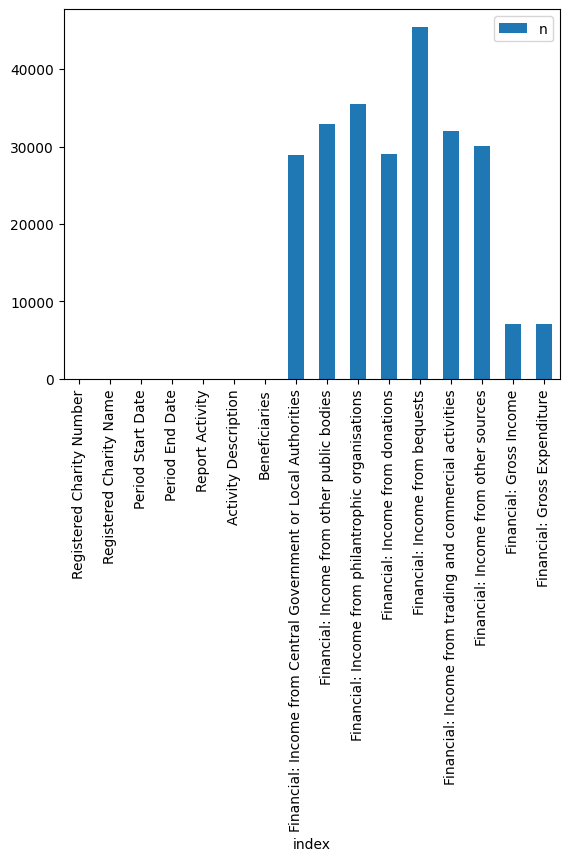

In [52]:
file_2.isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=90)

Missing values - proportion per column:

<Figure size 1000x600 with 0 Axes>

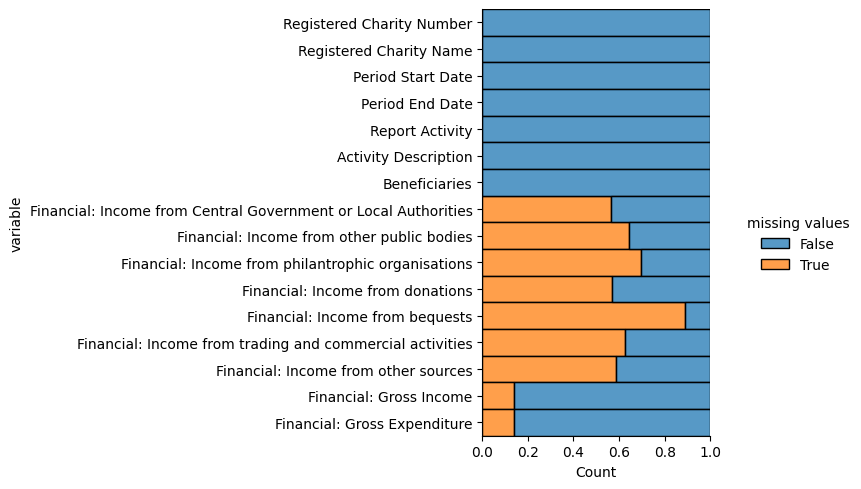

In [53]:
plt.figure(figsize=(10,6))
sns.displot(
    data=file_2.isna().melt(value_name="missing values"),
    y="variable",
    hue="missing values",
    multiple="fill",
    aspect=1.50
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)


Let's also look at NaN missing values populated in one of the financial columns and confirm if they are really missing values by using ```isnull()``` method. 

In [54]:
file_2['Financial: Gross Income']

0        2.246371e+10
1        2.131586e+10
2        1.806999e+10
3        1.602118e+10
4        1.508940e+10
             ...     
51129             NaN
51130             NaN
51131             NaN
51132             NaN
51133             NaN
Name: Financial: Gross Income, Length: 51134, dtype: float64

In [55]:
file_2['Financial: Gross Income'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
51129     True
51130     True
51131     True
51132     True
51133     True
Name: Financial: Gross Income, Length: 51134, dtype: bool

Yes, one 'NaN' value is the missing values - the 3rd value boolean response is ```True``` corresponding to NaN value, while the first 2 responses are ```False``` which correspond to numerical values.

NaN values will be replaced with 0.

In [56]:
file_2[['Financial: Income from Central Government or Local Authorities',
                        'Financial: Income from other public bodies',
                        'Financial: Income from philantrophic organisations',
                        'Financial: Income from donations',
                        'Financial: Income from trading and commercial activities',
                        'Financial: Income from other sources',
                        'Financial: Gross Income',
                        'Financial: Gross Expenditure']] = file_2[['Financial: Income from Central Government or Local Authorities',
                        'Financial: Income from other public bodies',
                        'Financial: Income from philantrophic organisations',
                        'Financial: Income from donations',
                        'Financial: Income from trading and commercial activities',
                        'Financial: Income from other sources',
                        'Financial: Gross Income',
                        'Financial: Gross Expenditure']].fillna(0)

Let's format float values and add comma separators by default. 

In addition, to make all large values nice and easy to read, we will remove decimal points. 

Finally, we will add '€' symbol to all float values.

This tip was sourced from: [https://stackoverflow.com/](https://stackoverflow.com/questions/43102734/format-a-number-with-commas-to-separate-thousands)

In [57]:
pd.options.display.float_format = '€{:,.0f}'.format

In [58]:
file_2.head()

,Registered Charity Number,Registered Charity Name,Period Start Date,Period End Date,Report Activity,Activity Description,Beneficiaries,Financial: Income from Central Government or Local Authorities,Financial: Income from other public bodies,Financial: Income from philantrophic organisations,Financial: Income from donations,Financial: Income from bequests,Financial: Income from trading and commercial activities,Financial: Income from other sources,Financial: Gross Income,Financial: Gross Expenditure
0,20059064,Health Service Executive,2021-01-01,2021-12-31,"""Promotion of health, including the prevention...","The HSE is Irelands public health services, d...",Carers; Community services; Family services; H...,"€21,603,123,000","€43,624,000","€7,904,000","€15,497,000",0,"€342,780,000","€450,786,000","€22,463,714,000","€22,704,210,000"
1,20059064,Health Service Executive,2020-01-01,2020-12-31,"""Promotion of health, including the prevention...",The HSE delivers health and personal service i...,Carers; Community services; Family services; H...,"€20,474,829,000","€29,256,000","€9,341,000","€2,513,000",0,"€408,249,000","€391,677,000","€21,315,865,000","€21,047,747,000"
2,20059064,Health Service Executive,2019-01-01,2019-12-31,"""Promotion of health, including the prevention...",The HSE delivers health and personal services ...,Carers; Community services; Family services; H...,"€17,149,136,000","€17,732,000","€9,273,000","€3,266,000",NaN,"€408,249,000","€482,333,000","€18,069,989,000","€17,925,482,000"
3,20059064,Health Service Executive,2018-01-01,2018-12-31,"""Promotion of health, including the prevention...",The HSE manages and delivers health and person...,Carers; Community services; Family services; H...,"€15,081,753,000",€0,"€13,358,000","€2,800,000",NaN,€0,"€923,268,000","€16,021,179,000","€16,106,353,000"
4,20059064,Health Service Executive,2017-01-01,2017-12-31,"""Promotion of health, including the prevention...",In 2017 the HSE promoted a number of public he...,Carers; Community services; Family services; H...,"€14,145,915,000",€0,"€8,232,000","€3,030,000",NaN,€0,"€932,228,000","€15,089,405,000","€15,229,276,000"


One of our goals is to review charities financials only for year 2021.

File_2 currently contains financial data since 2014. That is recorderd on 50793 rows. 

Before we merge our tables, let's filter file_2 and only retrieve data for the year 2021.

In [59]:
file_2 = file_2.loc[(file_2['Period Start Date'] == '2021-01-01')
                     & (file_2['Period End Date'] == '2021-12-31')]
file_2

,Registered Charity Number,Registered Charity Name,Period Start Date,Period End Date,Report Activity,Activity Description,Beneficiaries,Financial: Income from Central Government or Local Authorities,Financial: Income from other public bodies,Financial: Income from philantrophic organisations,Financial: Income from donations,Financial: Income from bequests,Financial: Income from trading and commercial activities,Financial: Income from other sources,Financial: Gross Income,Financial: Gross Expenditure
0,20059064,Health Service Executive,2021-01-01,2021-12-31,"""Promotion of health, including the prevention...","The HSE is Irelands public health services, d...",Carers; Community services; Family services; H...,"€21,603,123,000","€43,624,000","€7,904,000","€15,497,000",0,"€342,780,000","€450,786,000","€22,463,714,000","€22,704,210,000"
9,20020286,Higher Education Authority,2021-01-01,2021-12-31,Education/training; Disability support; Enviro...,Promotion of equity of access to higher educat...,Education services; Environmental protection a...,"€1,865,583,000","€157,000",€0,€0,0,€0,"€14,790,000","€1,880,530,000","€1,881,773,000"
17,20029609,Pobal,2021-01-01,2021-12-31,"Relief of poverty; ""Welfare of those in need b...",Pobal is a not-for-profit company that manages...,Adult training; Advocacy and civil rights; Asy...,"€814,498,000",€0,€0,€0,0,€0,"€2,000","€814,500,000","€814,613,000"
30,20083236,City of Dublin Education and Training Board,2021-01-01,2021-12-31,Education/training,City of Dublin Education and Training Board (C...,Education services; Adult training; Asylum see...,"€439,170,502","€118,512,462",€0,"€84,238",0,"€317,127","€5,963,803","€564,048,132","€561,647,991"
33,20017583,St. James's Hospital Board,2021-01-01,2021-12-31,"""Promotion of health, including the prevention...",St. James's Hospital is Ireland's largest acut...,Health promotion; Mental health support; Treat...,€0,"€481,227,000",€0,€0,0,"€62,993,000",€0,"€544,220,000","€541,800,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44073,20206182,Divine Word Missionaries Company Limited By Gu...,2021-01-01,2021-12-31,Religious activities,This is the new company structure for Divine W...,Religious activities,€0,€0,€0,€0,0,€0,€0,€0,€0
44074,20206188,The Iris Charles Centre Company,2021-01-01,2021-12-31,Promotion of community,The object of the Company is to provide for th...,Adult training; Arts & culture; Community serv...,€0,€0,€0,€0,0,€0,€0,€0,€0
44075,20206279,Narraghmore Development Company Limited By Gua...,2021-01-01,2021-12-31,Volunteer development; Promotion of community;...,Charitable status was not awarded until Feb 20...,Community services; The elderly; Voluntary and...,€0,€0,€0,€0,0,€0,€0,€0,€0
44076,20206297,Tech Equity Foundation,2021-01-01,2021-12-31,Education/training,Tech Equity Foundation (the TEF or Foundati...,Adult training,€0,€0,€0,€0,0,€0,€0,€0,€0


We have retrieved 3340 rows. That is significant difference in comparison to 50593 rows previously received and it will definitly improve performance of further queries.  


In [60]:
file_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3608 entries, 0 to 44077
Data columns (total 16 columns):
 #   Column                                                          Non-Null Count  Dtype         
---  ------                                                          --------------  -----         
 0   Registered Charity Number                                       3608 non-null   string        
 1   Registered Charity Name                                         3608 non-null   string        
 2   Period Start Date                                               3608 non-null   datetime64[ns]
 3   Period End Date                                                 3608 non-null   datetime64[ns]
 4   Report Activity                                                 3608 non-null   string        
 5   Activity Description                                            3608 non-null   string        
 6   Beneficiaries                                                   3608 non-null   string 

<a id ='merge'></a>
### Merging two datasets: File_1 & File_2

Please note, file_1 will be merged with the filtered ```file_2_2021```.

We will use ```Registered Charity Number``` column to merge two datasets. 
We will also merge the datasets using right join, to ensure that we do not miss any financials from 2021. 



In [61]:
file_3 = pd.merge(file_1, file_2, on='Registered Charity Number', how='right')
file_3.head()

,Registered Charity Number,Registered Charity Name_x,Status,Also Known As,Primary Address,Governing Form,CRO Number,Country Established,Charitable Purpose,Charitable Objects,...,Beneficiaries,Financial: Income from Central Government or Local Authorities,Financial: Income from other public bodies,Financial: Income from philantrophic organisations,Financial: Income from donations,Financial: Income from bequests,Financial: Income from trading and commercial activities,Financial: Income from other sources,Financial: Gross Income,Financial: Gross Expenditure
0,20059064,Health Service Executive,Registered,Health Service Executive; HSE,"Oak House, Millennium Business Park, Naas, Co....",Other,,Ireland,Other purpose that is of benefit to the commun...,Section 7 of the Health Act 2004 - The object ...,...,Carers; Community services; Family services; H...,"€21,603,123,000","€43,624,000","€7,904,000","€15,497,000",0,"€342,780,000","€450,786,000","€22,463,714,000","€22,704,210,000"
1,20020286,Higher Education Authority,Registered,Higher Education Authority; An tÚdarás um Ard-...,"3 Shelbourne Buildings, Crampton Avenue, Shelb...",Other,,Ireland,Advancement of education,The HEA has the following statutory functions;...,...,Education services; Environmental protection a...,"€1,865,583,000","€157,000",€0,€0,0,€0,"€14,790,000","€1,880,530,000","€1,881,773,000"
2,20029609,POBAL,Registered,POBAL,"Holbrook House, Holles Street, Ireland",Company Limited by Guarantee,194360,Ireland,Relief of poverty or economic hardship; Other ...,(1) The delivery and management of programmes ...,...,Adult training; Advocacy and civil rights; Asy...,"€814,498,000",€0,€0,€0,0,€0,"€2,000","€814,500,000","€814,613,000"
3,20083236,City of Dublin Education and Training Board,Registered,City of Dublin Education and Training Board,"Town Hall, Merrion Road, Ballsbridge, Dublin 4...",Other,,Ireland,Advancement of education,The advancement of Education & Training within...,...,Education services; Adult training; Asylum see...,"€439,170,502","€118,512,462",€0,"€84,238",0,"€317,127","€5,963,803","€564,048,132","€561,647,991"
4,20017583,St. James's Hospital Board,Registered,Saint James Hospital; St. James's Hospital Board,"St. James's Hospital Board, James Street, Dubl...",Other,,Ireland,Other purpose that is of benefit to the commun...,"To conduct, maintain, manage and develop at th...",...,Health promotion; Mental health support; Treat...,€0,"€481,227,000",€0,€0,0,"€62,993,000",€0,"€544,220,000","€541,800,000"


In [62]:
file_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3608 entries, 0 to 3607
Data columns (total 25 columns):
 #   Column                                                          Non-Null Count  Dtype         
---  ------                                                          --------------  -----         
 0   Registered Charity Number                                       3608 non-null   string        
 1   Registered Charity Name_x                                       3608 non-null   string        
 2   Status                                                          3608 non-null   string        
 3   Also Known As                                                   3608 non-null   string        
 4   Primary Address                                                 3608 non-null   string        
 5   Governing Form                                                  3608 non-null   string        
 6   CRO Number                                                      3608 non-null   string  

```Registered Charity Name``` (x & y) columns were located in both datasets (file_1 and file_2), therefore they have been populated in file_3 twice. Let's delete ```Registered Charity Name_y``` from file_3 and change ```Registered Charity Name_x``` column's name to ```Registered Charity Name```.

Finally, we will shorten the name of columns containing financial data.

In [63]:
file_3.rename(columns={'Registered Charity Name_x':'Registered Charity Name',
                       'Financial: Income from Central Government or Local Authorities':'Income: Central_Gov Local_Auth',
                        'Financial: Income from other public bodies':'Income: Other Public Bodies',
                        'Financial: Income from philantrophic organisations':'Income: Philantrophic Orgs',
                        'Financial: Income from donations':'Income: Donations',
                        'Financial: Income from trading and commercial activities':'Income: Trading & Commercial',
                        'Financial: Income from other sources':'Income: Other Sources',
                        'Financial: Gross Income':'Total Gross Income',
                        'Financial: Gross Expenditure':'Total Gross Expenditure'}, inplace = True)

In [64]:
del file_3['Registered Charity Name_y']

In [65]:
#file_3 = file_3.rename(columns={'Registered Charity Name_x':'Registered Charity Name'})

In [66]:
file_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3608 entries, 0 to 3607
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Registered Charity Number        3608 non-null   string        
 1   Registered Charity Name          3608 non-null   string        
 2   Status                           3608 non-null   string        
 3   Also Known As                    3608 non-null   string        
 4   Primary Address                  3608 non-null   string        
 5   Governing Form                   3608 non-null   string        
 6   CRO Number                       3608 non-null   string        
 7   Country Established              3608 non-null   string        
 8   Charitable Purpose               3608 non-null   string        
 9   Charitable Objects               3608 non-null   string        
 10  Period Start Date                3608 non-null   datetime64[

<a id ='Part_2'></a>
## Part 2
<a id ='explore'></a>
### Data Exploration


Check a type of the file that will be explored:

In [67]:
type(file_3)

pandas.core.frame.DataFrame

In [68]:
type(file_3['Registered Charity Name'])

pandas.core.series.Series

Let's look at the top and the bottom of data:

In [69]:
file_3.head()

,Registered Charity Number,Registered Charity Name,Status,Also Known As,Primary Address,Governing Form,CRO Number,Country Established,Charitable Purpose,Charitable Objects,...,Beneficiaries,Income: Central_Gov Local_Auth,Income: Other Public Bodies,Income: Philantrophic Orgs,Income: Donations,Financial: Income from bequests,Income: Trading & Commercial,Income: Other Sources,Total Gross Income,Total Gross Expenditure
0,20059064,Health Service Executive,Registered,Health Service Executive; HSE,"Oak House, Millennium Business Park, Naas, Co....",Other,,Ireland,Other purpose that is of benefit to the commun...,Section 7 of the Health Act 2004 - The object ...,...,Carers; Community services; Family services; H...,"€21,603,123,000","€43,624,000","€7,904,000","€15,497,000",0,"€342,780,000","€450,786,000","€22,463,714,000","€22,704,210,000"
1,20020286,Higher Education Authority,Registered,Higher Education Authority; An tÚdarás um Ard-...,"3 Shelbourne Buildings, Crampton Avenue, Shelb...",Other,,Ireland,Advancement of education,The HEA has the following statutory functions;...,...,Education services; Environmental protection a...,"€1,865,583,000","€157,000",€0,€0,0,€0,"€14,790,000","€1,880,530,000","€1,881,773,000"
2,20029609,POBAL,Registered,POBAL,"Holbrook House, Holles Street, Ireland",Company Limited by Guarantee,194360,Ireland,Relief of poverty or economic hardship; Other ...,(1) The delivery and management of programmes ...,...,Adult training; Advocacy and civil rights; Asy...,"€814,498,000",€0,€0,€0,0,€0,"€2,000","€814,500,000","€814,613,000"
3,20083236,City of Dublin Education and Training Board,Registered,City of Dublin Education and Training Board,"Town Hall, Merrion Road, Ballsbridge, Dublin 4...",Other,,Ireland,Advancement of education,The advancement of Education & Training within...,...,Education services; Adult training; Asylum see...,"€439,170,502","€118,512,462",€0,"€84,238",0,"€317,127","€5,963,803","€564,048,132","€561,647,991"
4,20017583,St. James's Hospital Board,Registered,Saint James Hospital; St. James's Hospital Board,"St. James's Hospital Board, James Street, Dubl...",Other,,Ireland,Other purpose that is of benefit to the commun...,"To conduct, maintain, manage and develop at th...",...,Health promotion; Mental health support; Treat...,€0,"€481,227,000",€0,€0,0,"€62,993,000",€0,"€544,220,000","€541,800,000"


In [70]:
file_3.tail()

,Registered Charity Number,Registered Charity Name,Status,Also Known As,Primary Address,Governing Form,CRO Number,Country Established,Charitable Purpose,Charitable Objects,...,Beneficiaries,Income: Central_Gov Local_Auth,Income: Other Public Bodies,Income: Philantrophic Orgs,Income: Donations,Financial: Income from bequests,Income: Trading & Commercial,Income: Other Sources,Total Gross Income,Total Gross Expenditure
3603,20206182,DIVINE WORD MISSIONARIES COMPANY LIMITED BY GU...,Registered,DIVINE WORD MISSIONARIES COMPANY LIMITED BY GU...,"DIVINE WORD MISSIONARIES, 1 Pembroke Road, , B...",CLG - Company Limited by Guarantee,669297,Ireland,Advancement of religion,The main object for which the Company is estab...,...,Religious activities,€0,€0,€0,€0,0,€0,€0,€0,€0
3604,20206188,THE IRIS CHARLES CENTRE COMPANY,Registered,THE IRIS CHARLES CENTRE COMPANY,"Iris Charles Centre, Newbridge Avenue, Sandymo...",CLG - Company Limited by Guarantee (licenced c...,654977,Ireland,Other purpose that is of benefit to the commun...,The main object for which the Company is estab...,...,Adult training; Arts & culture; Community serv...,€0,€0,€0,€0,0,€0,€0,€0,€0
3605,20206279,NARRAGHMORE DEVELOPMENT COMPANY LIMITED BY GUA...,Registered,NARRAGHMORE DEVELOPMENT COMPANY LIMITED BY GUA...,"26 Oak Park, , , Narraghmore, Republic of Ireland",CLG - Company Limited by Guarantee,677245,Ireland,Other purpose that is of benefit to the commun...,The main object for which the Company is estab...,...,Community services; The elderly; Voluntary and...,€0,€0,€0,€0,0,€0,€0,€0,€0
3606,20206297,Tech Equity Foundation,Registered,Tech Equity Foundation,"11 Churchwell Mews, Belmayne - Balgriffin, , D...",Association,,Ireland,Relief of poverty or economic hardship; Advanc...,The main object for which the Body is establis...,...,Adult training,€0,€0,€0,€0,0,€0,€0,€0,€0
3607,20206301,IRISH GIRL GUIDES COMPANY LIMITED BY GUARANTEE,Registered,IRISH GIRL GUIDES COMPANY LIMITED BY GUARANTEE...,"IRISH GIRL GUIDES CLG, Trefoil House, 27 Pembr...",CLG - Company Limited by Guarantee,657940,Ireland,Other purpose that is of benefit to the commun...,The main object of Irish Girl Guides is to ena...,...,Adult training,€0,€0,€0,€0,0,€0,€0,€0,€0


Let's check the size of the file_3:

In [71]:
file_3.shape

(3608, 24)

In [72]:
file_3.count()

Registered Charity Number          3608
Registered Charity Name            3608
Status                             3608
Also Known As                      3608
Primary Address                    3608
Governing Form                     3608
CRO Number                         3608
Country Established                3608
Charitable Purpose                 3608
Charitable Objects                 3608
Period Start Date                  3608
Period End Date                    3608
Report Activity                    3608
Activity Description               3608
Beneficiaries                      3608
Income: Central_Gov Local_Auth     3608
Income: Other Public Bodies        3608
Income: Philantrophic Orgs         3608
Income: Donations                  3608
Financial: Income from bequests    3595
Income: Trading & Commercial       3608
Income: Other Sources              3608
Total Gross Income                 3608
Total Gross Expenditure            3608
dtype: int64

There are 24 columns and 3340rows.


Let's see how the data is displayed for all the columns presenting the financial results only:

In [73]:
file_3.iloc[0:10, 16:24]

,Income: Other Public Bodies,Income: Philantrophic Orgs,Income: Donations,Financial: Income from bequests,Income: Trading & Commercial,Income: Other Sources,Total Gross Income,Total Gross Expenditure
0,"€43,624,000","€7,904,000","€15,497,000",0,"€342,780,000","€450,786,000","€22,463,714,000","€22,704,210,000"
1,"€157,000",€0,€0,0,€0,"€14,790,000","€1,880,530,000","€1,881,773,000"
2,€0,€0,€0,0,€0,"€2,000","€814,500,000","€814,613,000"
3,"€118,512,462",€0,"€84,238",0,"€317,127","€5,963,803","€564,048,132","€561,647,991"
4,"€481,227,000",€0,€0,0,"€62,993,000",€0,"€544,220,000","€541,800,000"
5,"€7,700,000",€0,"€497,000",0,"€379,000","€26,030,000","€417,616,000","€417,400,000"
6,"€5,435,000",€0,€0,"23,000","€359,818,000",€0,"€365,276,000","€357,171,000"
7,"€295,701,717",€0,€0,0,€0,"€39,035,410","€334,737,127","€335,403,308"
8,"€78,562,552","€167,500",€0,0,€0,"€6,158,767","€233,327,477","€232,371,707"
9,"€46,321,000",€0,"€55,231,000","3,004,000","€538,000","€326,000","€228,353,000","€217,312,000"


Let's check the totals for each financial data: 

In [74]:
total = file_3.iloc[:,16:24].sum()
total

C:\Users\Michal\AppData\Local\Temp\ipykernel_21856\3801274803.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  total = file_3.iloc[:,16:24].sum()


Income: Other Public Bodies     €2,469,293,533
Income: Philantrophic Orgs         €80,673,324
Income: Donations                 €810,881,192
Income: Trading & Commercial    €1,486,276,675
Income: Other Sources           €1,262,943,695
Total Gross Income             €35,766,619,949
Total Gross Expenditure        €35,570,471,345
dtype: float64

Description of the data in file_3:

In [75]:
file_3.describe()

,Income: Central_Gov Local_Auth,Income: Other Public Bodies,Income: Philantrophic Orgs,Income: Donations,Income: Trading & Commercial,Income: Other Sources,Total Gross Income,Total Gross Expenditure
count,"€3,608","€3,608","€3,608","€3,608","€3,608","€3,608","€3,608","€3,608"
mean,"€8,200,088","€684,394","€22,360","€224,745","€411,939","€350,040","€9,913,143","€9,858,778"
std,"€361,451,357","€10,916,217","€240,120","€1,633,890","€8,544,978","€7,653,368","€376,066,186","€380,036,492"
min,€0,€0,€0,€0,€0,€0,€0,€0
25%,€0,€0,€0,€0,€0,€0,"€31,780","€25,403"
50%,"€12,670",€0,€0,"€2,064",€0,€350,"€189,654","€167,234"
75%,"€255,685","€8,409",€0,"€34,076","€25,028","€26,543","€720,437","€649,930"
max,"€21,603,123,000","€481,227,000","€7,904,000","€55,231,000","€359,818,000","€450,786,000","€22,463,714,000","€22,704,210,000"


Let's visualise all financial data using boxplot. 

To make it easier to review, 8 columns coresponding to financial information will be stored in a new dataframe: ```financials```

In [76]:
import numpy as np,pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
financials = pd.DataFrame(file_3, columns=['Income: Central_Gov Local_Auth',
                                           'Income: Other Public Bodies',
                                           'Income: Philantrophic Orgs',
                                           'Income: Donations',
                                           'Income: Trading & Commercial',
                                           'Income: Other Sources',
                                           'Total Gross Income',
                                           'Total Gross Expenditure'])

In [77]:
financials.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3608 entries, 0 to 3607
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Income: Central_Gov Local_Auth  3608 non-null   float64
 1   Income: Other Public Bodies     3608 non-null   float64
 2   Income: Philantrophic Orgs      3608 non-null   float64
 3   Income: Donations               3608 non-null   float64
 4   Income: Trading & Commercial    3608 non-null   float64
 5   Income: Other Sources           3608 non-null   float64
 6   Total Gross Income              3608 non-null   float64
 7   Total Gross Expenditure         3608 non-null   float64
dtypes: float64(8)
memory usage: 253.7 KB


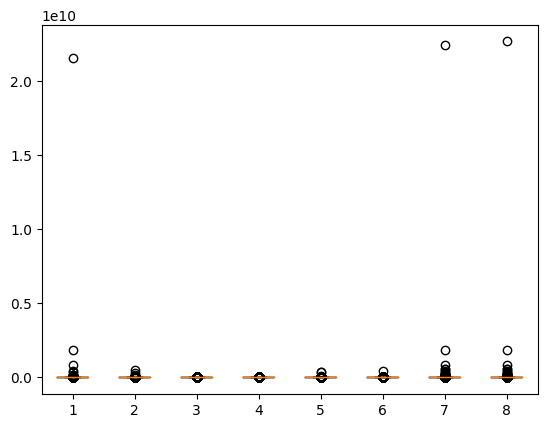

In [78]:
plt.boxplot(financials)
plt.show()

We can that 3 variables have highly visible outliers:

- Income: Central_Gov Local_Auth
- Total Gross Income
- Total Gross Expenditure

Let's look at all financial variables and check their distributions:

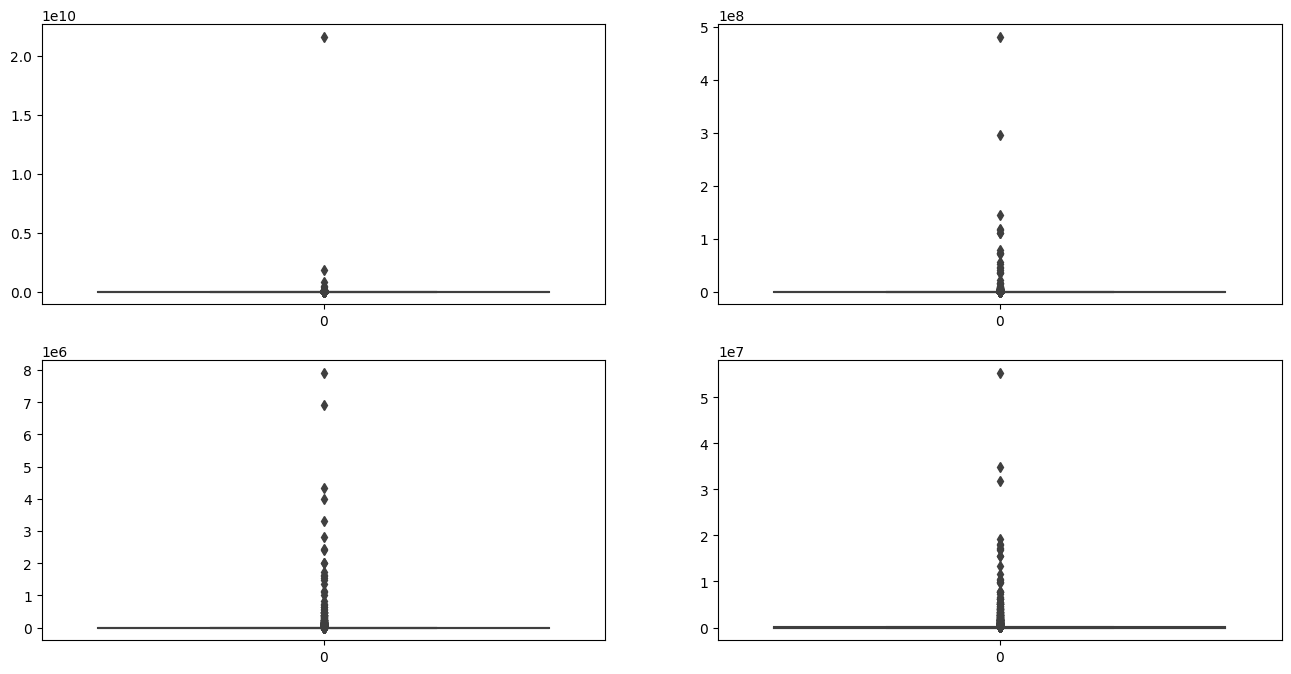

In [79]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(file_3['Income: Central_Gov Local_Auth'])
plt.subplot(2,2,2)
sns.boxplot(file_3['Income: Other Public Bodies'])
plt.subplot(2,2,3)
sns.boxplot(file_3['Income: Philantrophic Orgs'])
plt.subplot(2,2,4)
sns.boxplot(file_3['Income: Donations'])
plt.show()

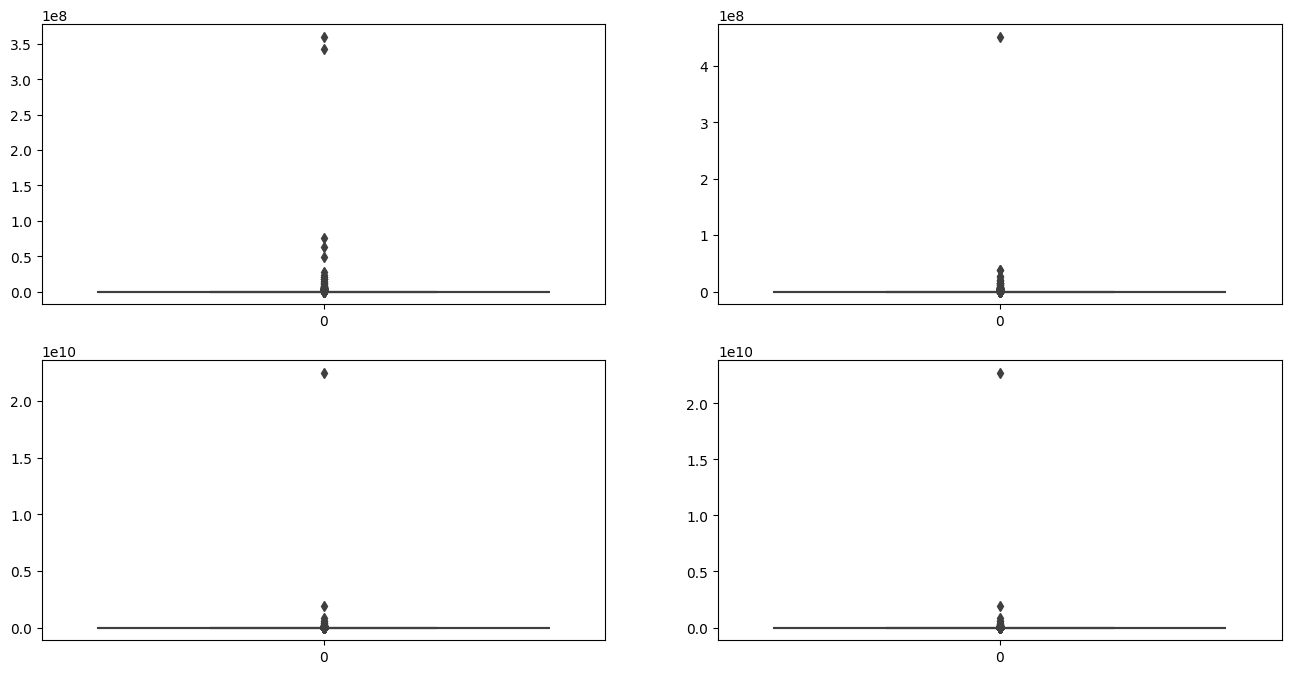

In [80]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(file_3['Income: Trading & Commercial'])
plt.subplot(2,2,2)
sns.boxplot(file_3['Income: Other Sources'])
plt.subplot(2,2,3)
sns.boxplot(file_3['Total Gross Income'])
plt.subplot(2,2,4)
sns.boxplot(file_3['Total Gross Expenditure'])
plt.show()

In [81]:
file_3.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
Income: Central_Gov Local_Auth,"€3,608","€8,200,088","€361,451,357",€0,€0,"€12,670","€255,685","€21,603,123,000"
Income: Other Public Bodies,"€3,608","€684,394","€10,916,217",€0,€0,€0,"€8,409","€481,227,000"
Income: Philantrophic Orgs,"€3,608","€22,360","€240,120",€0,€0,€0,€0,"€7,904,000"
Income: Donations,"€3,608","€224,745","€1,633,890",€0,€0,"€2,064","€34,076","€55,231,000"
Income: Trading & Commercial,"€3,608","€411,939","€8,544,978",€0,€0,€0,"€25,028","€359,818,000"
Income: Other Sources,"€3,608","€350,040","€7,653,368",€0,€0,€350,"€26,543","€450,786,000"
Total Gross Income,"€3,608","€9,913,143","€376,066,186",€0,"€31,780","€189,654","€720,437","€22,463,714,000"
Total Gross Expenditure,"€3,608","€9,858,778","€380,036,492",€0,"€25,403","€167,234","€649,930","€22,704,210,000"


We can see that ever single financial variable has values outside the whiskers of the plot, significantly distant from the rest of the data. 

Those values represent outliers.

<a id ='Part_3'></a>
<a id ='analysis'></a>
## Part 3

### Data Analysis

#### Top Questions:
1. [What is Total Gross Income for all charities in 2021?](#q1)
2. [Top 5 charities with the highest Total Gross Income in 2021?](#q2)
3. [Top 5 charities with the highest Total Gross Expenditure in 2021?](#q3)
4. [Top 5 charities with the highest Total Net Income in 2021?](#q4)
5. [Top 5 charities with the lowest Total Net Income in 2021?](#q5)
6. [How many charities did not have any gross income in 2021?](#q6)
7. [Top 5 charities with the highest donations in 2021?](#q7)
8. [Top 5 Beneficiars and the amount of funds dedicted to support them in 2021?](#q8)
9. [Top 5 charities based on their main purpose in 2021?](#q9)
10. [Top 5 charities based on their governing form in 2021?](#q10)
11. [Total Gross Income - identifying outliers based on IQR (Interquartile Range)](#q11)
12. [What are the incomes and spendings based on the country where charity was established?](#q12)

<a id ='q1'></a>
#### 1. What is Total Gross Income for all charities in 2021?

In [82]:
Total_Gross_Income = total = file_3['Total Gross Income'].sum()
Total_Gross_Income

35766619949.0

<a id ='q2'></a>
#### 2. Top 5 charities with the highest Total Gross Income in 2021?

In [83]:
file_3.nlargest(n=5, columns=['Total Gross Income'])

,Registered Charity Number,Registered Charity Name,Status,Also Known As,Primary Address,Governing Form,CRO Number,Country Established,Charitable Purpose,Charitable Objects,...,Beneficiaries,Income: Central_Gov Local_Auth,Income: Other Public Bodies,Income: Philantrophic Orgs,Income: Donations,Financial: Income from bequests,Income: Trading & Commercial,Income: Other Sources,Total Gross Income,Total Gross Expenditure
0,20059064,Health Service Executive,Registered,Health Service Executive; HSE,"Oak House, Millennium Business Park, Naas, Co....",Other,,Ireland,Other purpose that is of benefit to the commun...,Section 7 of the Health Act 2004 - The object ...,...,Carers; Community services; Family services; H...,"€21,603,123,000","€43,624,000","€7,904,000","€15,497,000",0,"€342,780,000","€450,786,000","€22,463,714,000","€22,704,210,000"
1,20020286,Higher Education Authority,Registered,Higher Education Authority; An tÚdarás um Ard-...,"3 Shelbourne Buildings, Crampton Avenue, Shelb...",Other,,Ireland,Advancement of education,The HEA has the following statutory functions;...,...,Education services; Environmental protection a...,"€1,865,583,000","€157,000",€0,€0,0,€0,"€14,790,000","€1,880,530,000","€1,881,773,000"
2,20029609,POBAL,Registered,POBAL,"Holbrook House, Holles Street, Ireland",Company Limited by Guarantee,194360,Ireland,Relief of poverty or economic hardship; Other ...,(1) The delivery and management of programmes ...,...,Adult training; Advocacy and civil rights; Asy...,"€814,498,000",€0,€0,€0,0,€0,"€2,000","€814,500,000","€814,613,000"
3,20083236,City of Dublin Education and Training Board,Registered,City of Dublin Education and Training Board,"Town Hall, Merrion Road, Ballsbridge, Dublin 4...",Other,,Ireland,Advancement of education,The advancement of Education & Training within...,...,Education services; Adult training; Asylum see...,"€439,170,502","€118,512,462",€0,"€84,238",0,"€317,127","€5,963,803","€564,048,132","€561,647,991"
4,20017583,St. James's Hospital Board,Registered,Saint James Hospital; St. James's Hospital Board,"St. James's Hospital Board, James Street, Dubl...",Other,,Ireland,Other purpose that is of benefit to the commun...,"To conduct, maintain, manage and develop at th...",...,Health promotion; Mental health support; Treat...,€0,"€481,227,000",€0,€0,0,"€62,993,000",€0,"€544,220,000","€541,800,000"


Top 5 charities with the highest ```Total Gross Income``` earned more than half a billion euros.

Let's query if there are any more charities with ```Total Gross Income``` over half a billion euros.

In [84]:
half_billion = file_3.query("`Total Gross Income` >= 500000000")
half_billion.head()

,Registered Charity Number,Registered Charity Name,Status,Also Known As,Primary Address,Governing Form,CRO Number,Country Established,Charitable Purpose,Charitable Objects,...,Beneficiaries,Income: Central_Gov Local_Auth,Income: Other Public Bodies,Income: Philantrophic Orgs,Income: Donations,Financial: Income from bequests,Income: Trading & Commercial,Income: Other Sources,Total Gross Income,Total Gross Expenditure
0,20059064,Health Service Executive,Registered,Health Service Executive; HSE,"Oak House, Millennium Business Park, Naas, Co....",Other,,Ireland,Other purpose that is of benefit to the commun...,Section 7 of the Health Act 2004 - The object ...,...,Carers; Community services; Family services; H...,"€21,603,123,000","€43,624,000","€7,904,000","€15,497,000",0,"€342,780,000","€450,786,000","€22,463,714,000","€22,704,210,000"
1,20020286,Higher Education Authority,Registered,Higher Education Authority; An tÚdarás um Ard-...,"3 Shelbourne Buildings, Crampton Avenue, Shelb...",Other,,Ireland,Advancement of education,The HEA has the following statutory functions;...,...,Education services; Environmental protection a...,"€1,865,583,000","€157,000",€0,€0,0,€0,"€14,790,000","€1,880,530,000","€1,881,773,000"
2,20029609,POBAL,Registered,POBAL,"Holbrook House, Holles Street, Ireland",Company Limited by Guarantee,194360,Ireland,Relief of poverty or economic hardship; Other ...,(1) The delivery and management of programmes ...,...,Adult training; Advocacy and civil rights; Asy...,"€814,498,000",€0,€0,€0,0,€0,"€2,000","€814,500,000","€814,613,000"
3,20083236,City of Dublin Education and Training Board,Registered,City of Dublin Education and Training Board,"Town Hall, Merrion Road, Ballsbridge, Dublin 4...",Other,,Ireland,Advancement of education,The advancement of Education & Training within...,...,Education services; Adult training; Asylum see...,"€439,170,502","€118,512,462",€0,"€84,238",0,"€317,127","€5,963,803","€564,048,132","€561,647,991"
4,20017583,St. James's Hospital Board,Registered,Saint James Hospital; St. James's Hospital Board,"St. James's Hospital Board, James Street, Dubl...",Other,,Ireland,Other purpose that is of benefit to the commun...,"To conduct, maintain, manage and develop at th...",...,Health promotion; Mental health support; Treat...,€0,"€481,227,000",€0,€0,0,"€62,993,000",€0,"€544,220,000","€541,800,000"


Top 5 charities in Ireland are aslo only charities with ```Total Gross Income``` above half a billion Euros in 2021.

HSE(Health Service Executive) is on the top of the list with over €22 billions of the ```Total Gross Income```and it is followed by HEA(Higher Education Authority) with over €20 billions less in the ```Total Gross Income``` - €1,880,530,000, that is very significant difference.

HSE clearly looks like an outlier among other charities based on ```Total Gross Income```

<a id ='q3'></a>
#### 3. Top 5 charities with the highest Total Gross Expenditure in 2021?

In [85]:
file_3.nlargest(n=5, columns=['Total Gross Expenditure'])

,Registered Charity Number,Registered Charity Name,Status,Also Known As,Primary Address,Governing Form,CRO Number,Country Established,Charitable Purpose,Charitable Objects,...,Beneficiaries,Income: Central_Gov Local_Auth,Income: Other Public Bodies,Income: Philantrophic Orgs,Income: Donations,Financial: Income from bequests,Income: Trading & Commercial,Income: Other Sources,Total Gross Income,Total Gross Expenditure
0,20059064,Health Service Executive,Registered,Health Service Executive; HSE,"Oak House, Millennium Business Park, Naas, Co....",Other,,Ireland,Other purpose that is of benefit to the commun...,Section 7 of the Health Act 2004 - The object ...,...,Carers; Community services; Family services; H...,"€21,603,123,000","€43,624,000","€7,904,000","€15,497,000",0,"€342,780,000","€450,786,000","€22,463,714,000","€22,704,210,000"
1,20020286,Higher Education Authority,Registered,Higher Education Authority; An tÚdarás um Ard-...,"3 Shelbourne Buildings, Crampton Avenue, Shelb...",Other,,Ireland,Advancement of education,The HEA has the following statutory functions;...,...,Education services; Environmental protection a...,"€1,865,583,000","€157,000",€0,€0,0,€0,"€14,790,000","€1,880,530,000","€1,881,773,000"
2,20029609,POBAL,Registered,POBAL,"Holbrook House, Holles Street, Ireland",Company Limited by Guarantee,194360,Ireland,Relief of poverty or economic hardship; Other ...,(1) The delivery and management of programmes ...,...,Adult training; Advocacy and civil rights; Asy...,"€814,498,000",€0,€0,€0,0,€0,"€2,000","€814,500,000","€814,613,000"
3,20083236,City of Dublin Education and Training Board,Registered,City of Dublin Education and Training Board,"Town Hall, Merrion Road, Ballsbridge, Dublin 4...",Other,,Ireland,Advancement of education,The advancement of Education & Training within...,...,Education services; Adult training; Asylum see...,"€439,170,502","€118,512,462",€0,"€84,238",0,"€317,127","€5,963,803","€564,048,132","€561,647,991"
4,20017583,St. James's Hospital Board,Registered,Saint James Hospital; St. James's Hospital Board,"St. James's Hospital Board, James Street, Dubl...",Other,,Ireland,Other purpose that is of benefit to the commun...,"To conduct, maintain, manage and develop at th...",...,Health promotion; Mental health support; Treat...,€0,"€481,227,000",€0,€0,0,"€62,993,000",€0,"€544,220,000","€541,800,000"


<a id ='q4'></a>
#### 4. Top 5 charities with the highest Total Net Income in 2021?

As we do not have a column ```Total Net Income```, we will need to create it by subtracting ```Total Gross Expenditure``` from ```Total Gross Income```

In [86]:
file_3['Total Net Income']= file_3['Total Gross Income'] - file_3['Total Gross Expenditure']

In [87]:
file_3.nlargest(n=5, columns=['Total Net Income'])

,Registered Charity Number,Registered Charity Name,Status,Also Known As,Primary Address,Governing Form,CRO Number,Country Established,Charitable Purpose,Charitable Objects,...,Income: Central_Gov Local_Auth,Income: Other Public Bodies,Income: Philantrophic Orgs,Income: Donations,Financial: Income from bequests,Income: Trading & Commercial,Income: Other Sources,Total Gross Income,Total Gross Expenditure,Total Net Income
1912,20006716,Rehab Group,Registered,Rehab Group,"Unit 10D Beckett Way, Parkwest Business Park, ...",Company Limited by Guarantee,14800,Ireland,Advancement of education; Other purpose that i...,"To provide or assist, by whatever manner or me...",...,"€129,567,621",€0,€0,"€138,812",0,"€20,960,477","€680,000","€151,346,910","€142,106","€151,204,804"
43,20046613,Tuath Housing Association Limited,Registered,Tuath Housing Association Limited,"TÚATH HOUSING ASSOCIATION, 33 Leeson Street Lo...",Company Limited by Guarantee,326944,Ireland,Relief of poverty or economic hardship; Other ...,"Our aim is to provide long-term, safe, quality...",...,"€58,821,540",€0,€0,€0,0,"€23,201,935",€0,"€82,023,475","€55,774,180","€26,249,295"
23,20079901,St Michael's House Group,Registered,St Michael's House Group,"Admin Building, Ballymun Road, Ballymun, Dubli...",Company Limited by Guarantee,511121,Ireland,Other purpose that is of benefit to the commun...,St. Michael's House provide a range of service...,...,"€14,845","€110,697,410",€0,"€337,446",0,"€1,145,991","€4,577,336","€116,773,028","€98,502,406","€18,270,622"
24,20008932,St Michael's House,Registered,St Michael's House,"Ballymun Road, Ballymun, Dublin 9., Ireland",Company Limited by Guarantee,27628,Ireland,Other purpose that is of benefit to the commun...,The main object for which the Company is estab...,...,"€14,845","€110,697,410",€0,"€370,796",0,"€1,145,991","€3,277,470","€115,506,512","€98,120,412","€17,386,100"
36,20029975,Cluid Housing Association,Registered,Cluid Housing Association; Clúid Housing,"159-161 Sheriff Street Upper, Dublin 1, , Dubl...",Company Limited by Guarantee,212249,Ireland,Relief of poverty or economic hardship; Other ...,"- providing and /or managing housing, shelter ...",...,"€61,866,214","€50,110",€0,€0,0,"€27,987,273","€518,464","€90,422,061","€73,425,732","€16,996,329"


<a id ='q5'></a>
#### 5. Top 5 charities with the lowest Total Net Income in 2021?

In [88]:
file_3.nsmallest(n=5, columns=['Total Net Income'])

,Registered Charity Number,Registered Charity Name,Status,Also Known As,Primary Address,Governing Form,CRO Number,Country Established,Charitable Purpose,Charitable Objects,...,Income: Central_Gov Local_Auth,Income: Other Public Bodies,Income: Philantrophic Orgs,Income: Donations,Financial: Income from bequests,Income: Trading & Commercial,Income: Other Sources,Total Gross Income,Total Gross Expenditure,Total Net Income
0,20059064,Health Service Executive,Registered,Health Service Executive; HSE,"Oak House, Millennium Business Park, Naas, Co....",Other,,Ireland,Other purpose that is of benefit to the commun...,Section 7 of the Health Act 2004 - The object ...,...,"€21,603,123,000","€43,624,000","€7,904,000","€15,497,000",0,"€342,780,000","€450,786,000","€22,463,714,000","€22,704,210,000","€-240,496,000"
11,20052324,Kinnegad Community Childcare Limited,Registered,Kinnegad Community Childcare Limited; Cairdeas,"KINNEGAD COMMUNITY CHILDCARE LTD., Cairdeas, K...",Company Limited by Guarantee,373750,Ireland,Other purpose that is of benefit to the commun...,"To provide quality, affordable childcare optio...",...,"€362,597",€150,€0,€0,0,"€116,127",€0,"€478,874","€183,208,119","€-182,729,245"
75,20083670,Presentation Brothers (Ireland) CLG,Registered,Presentation Brothers (Ireland); Presentation ...,"Presentation Brothers, Glasthule, Dun Laoghair...",CLG - Company Limited by Guarantee,535344,Ireland,Advancement of religion,"To advance the religious, social and charitabl...",...,€0,€0,€0,"€672,000",0,€0,"€350,000","€1,022,000","€20,432,000","€-19,410,000"
84,20000578,Trustees Of The Methodist Church In Ireland.,Registered,Trustees Of The Methodist Church In Ireland.; ...,"Mayo House, 16 Meadowfield, Sandyford, Dublin,...",Other,,Ireland,Advancement of religion,The advancement of the Christian religion by p...,...,€0,€0,€0,€0,0,€0,€0,€0,"€18,206,000","€-18,206,000"
85,20004231,St Patrick's Missionary Society Ireland,Registered,Saint Patrick's Missionary Society; Kiltegan F...,"SAINT PATRICK'S MISSIONARY SOCIETY, Saint Patr...",Association,,Ireland,Advancement of religion,To evangelise in Africa or in any other countr...,...,€0,€0,"€2,000,000","€3,368,517","822,265","€29,354","€3,060,083","€9,280,219","€17,851,465","€-8,571,246"


HSE had over €240 milsions of net loss in 2021.

<a id ='q6'></a>
#### 6. How many charities did not have any gross income in 2021?

In [89]:
count = (file_3['Total Gross Income'] == 0).sum()
count

128

<a id ='q7'></a>
#### 7. Top 5 charities with the highest donations in 2021?

In [90]:
file_3.nlargest(n=5, columns=['Income: Donations'])

,Registered Charity Number,Registered Charity Name,Status,Also Known As,Primary Address,Governing Form,CRO Number,Country Established,Charitable Purpose,Charitable Objects,...,Income: Central_Gov Local_Auth,Income: Other Public Bodies,Income: Philantrophic Orgs,Income: Donations,Financial: Income from bequests,Income: Trading & Commercial,Income: Other Sources,Total Gross Income,Total Gross Expenditure,Total Net Income
9,20009090,Concern Worldwide,Registered,Concern Worldwide; Concern,"52- 55 Camden Street Lower, Dublin 2, Republic...",CLG - Company Limited by Guarantee (licenced c...,39647,Ireland,Relief of poverty or economic hardship,"(i) The relief, assistance and advancement of...",...,"€122,933,000","€46,321,000",€0,"€55,231,000","3,004,000","€538,000","€326,000","€228,353,000","€217,312,000","€11,041,000"
48,20016166,Schools and Parishes of the Diocese of Dublin ...,Registered,Schools and Parishes of the Diocese of Dublin ...,"Finance Secretariat, Archdiocese of Dublin, 20...",Other Trust,,Ireland,Advancement of religion,The primary object of the Trust is to promote ...,...,"€2,194,000",€0,€0,"€34,882,000","1,089,000","€3,923,000","€10,108,000","€52,196,000","€45,552,000","€6,644,000"
29,20013806,St. Vincent de Paul - Council of Ireland,Registered,St. Vincent de Paul - Council of Ireland; Soci...,Society of St Vincent de Paul - COUNCIL of IRE...,Association,,Ireland,Relief of poverty or economic hardship; Relief...,The Society of St. Vincent de Paul (SVP) chari...,...,"€16,444,000",€0,€0,"€31,720,000","9,623,000",€0,"€27,045,000","€84,832,000","€80,100,000","€4,732,000"
71,20044879,The Foundation for Investing in Communities,Registered,The Foundation for Investing in Communities,"3rd Floor Phibsborough Tower, Phibsborough Roa...",CLG - Company Limited by Guarantee (licenced c...,296139,Ireland,Other purpose that is of benefit to the commun...,2.1 To provide or assist or encourage or suppo...,...,"€871,281",€0,"€1,614,280","€19,127,276",0,€0,"€8,501,778","€30,114,615","€22,975,700","€7,138,915"
74,20008727,Unicef Ireland,Registered,Unicef Ireland,"33 Lower Ormond Quay, Dublin 1, Dublin, Dublin...",Company Limited by Guarantee,371124,Ireland,Relief of poverty or economic hardship; Advanc...,The main object for which the Company is estab...,...,"€30,827",€0,"€1,110,470","€18,109,035","103,640",€0,"€2,212,358","€21,566,330","€20,566,330","€1,000,000"


Concern Worldwide is the most popular in terms of donations in Ireland.

<a id ='q8'></a>
#### 8. Top 5 Beneficiars and the funds dedicted to support them (Total Gross Expenditure)

Column ```Beneficiaries```contains several values(responses) in one field seperated by ';'.

The first value (response) in the filed will be retrieved and used as a main value for that field. We will call it ```Lead Beneficiary```. That will help us further analyse top beneficiaries. 

In [91]:
file_3['Lead Beneficiary'] = file_3['Beneficiaries'].str.split(';').str[0]

In [92]:
file_3

,Registered Charity Number,Registered Charity Name,Status,Also Known As,Primary Address,Governing Form,CRO Number,Country Established,Charitable Purpose,Charitable Objects,...,Income: Other Public Bodies,Income: Philantrophic Orgs,Income: Donations,Financial: Income from bequests,Income: Trading & Commercial,Income: Other Sources,Total Gross Income,Total Gross Expenditure,Total Net Income,Lead Beneficiary
0,20059064,Health Service Executive,Registered,Health Service Executive; HSE,"Oak House, Millennium Business Park, Naas, Co....",Other,,Ireland,Other purpose that is of benefit to the commun...,Section 7 of the Health Act 2004 - The object ...,...,"€43,624,000","€7,904,000","€15,497,000",0,"€342,780,000","€450,786,000","€22,463,714,000","€22,704,210,000","€-240,496,000",Carers
1,20020286,Higher Education Authority,Registered,Higher Education Authority; An tÚdarás um Ard-...,"3 Shelbourne Buildings, Crampton Avenue, Shelb...",Other,,Ireland,Advancement of education,The HEA has the following statutory functions;...,...,"€157,000",€0,€0,0,€0,"€14,790,000","€1,880,530,000","€1,881,773,000","€-1,243,000",Education services
2,20029609,POBAL,Registered,POBAL,"Holbrook House, Holles Street, Ireland",Company Limited by Guarantee,194360,Ireland,Relief of poverty or economic hardship; Other ...,(1) The delivery and management of programmes ...,...,€0,€0,€0,0,€0,"€2,000","€814,500,000","€814,613,000","€-113,000",Adult training
3,20083236,City of Dublin Education and Training Board,Registered,City of Dublin Education and Training Board,"Town Hall, Merrion Road, Ballsbridge, Dublin 4...",Other,,Ireland,Advancement of education,The advancement of Education & Training within...,...,"€118,512,462",€0,"€84,238",0,"€317,127","€5,963,803","€564,048,132","€561,647,991","€2,400,141",Education services
4,20017583,St. James's Hospital Board,Registered,Saint James Hospital; St. James's Hospital Board,"St. James's Hospital Board, James Street, Dubl...",Other,,Ireland,Other purpose that is of benefit to the commun...,"To conduct, maintain, manage and develop at th...",...,"€481,227,000",€0,€0,0,"€62,993,000",€0,"€544,220,000","€541,800,000","€2,420,000",Health promotion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3603,20206182,DIVINE WORD MISSIONARIES COMPANY LIMITED BY GU...,Registered,DIVINE WORD MISSIONARIES COMPANY LIMITED BY GU...,"DIVINE WORD MISSIONARIES, 1 Pembroke Road, , B...",CLG - Company Limited by Guarantee,669297,Ireland,Advancement of religion,The main object for which the Company is estab...,...,€0,€0,€0,0,€0,€0,€0,€0,€0,Religious activities
3604,20206188,THE IRIS CHARLES CENTRE COMPANY,Registered,THE IRIS CHARLES CENTRE COMPANY,"Iris Charles Centre, Newbridge Avenue, Sandymo...",CLG - Company Limited by Guarantee (licenced c...,654977,Ireland,Other purpose that is of benefit to the commun...,The main object for which the Company is estab...,...,€0,€0,€0,0,€0,€0,€0,€0,€0,Adult training
3605,20206279,NARRAGHMORE DEVELOPMENT COMPANY LIMITED BY GUA...,Registered,NARRAGHMORE DEVELOPMENT COMPANY LIMITED BY GUA...,"26 Oak Park, , , Narraghmore, Republic of Ireland",CLG - Company Limited by Guarantee,677245,Ireland,Other purpose that is of benefit to the commun...,The main object for which the Company is estab...,...,€0,€0,€0,0,€0,€0,€0,€0,€0,Community services
3606,20206297,Tech Equity Foundation,Registered,Tech Equity Foundation,"11 Churchwell Mews, Belmayne - Balgriffin, , D...",Association,,Ireland,Relief of poverty or economic hardship; Advanc...,The main object for which the Body is establis...,...,€0,€0,€0,0,€0,€0,€0,€0,€0,Adult training


Let's count top 10 beneficiaries:

In [93]:
top_beneficiaries_count = file_3.groupby(['Lead Beneficiary']).agg({'Total Gross Expenditure': 'count'}).nlargest(n=5, columns=['Total Gross Expenditure'])

In [94]:
top_beneficiaries_count

,Total Gross Expenditure
Lead Beneficiary,
Adult training,571
Religious activities,350
Arts & culture,277
Community services,270
Children's services,251


In [95]:
file_3['Lead Beneficiary'].value_counts()

Adult training                                                 571
Religious activities                                           350
Arts & culture                                                 277
Community services                                             270
Children's services                                            251
                                                              ... 
Suicide prevention                                               5
Treatment and prevention services                                4
Public broadcasting and media                                    3
"Libraries, historical societies and landmark preservation"      3
Social services                                                  3
Name: Lead Beneficiary, Length: 61, dtype: int64

Let's check top 10 beneficiaries and the funds dedicted to support them in 2021

In [96]:
top_beneficiaries_amount = file_3.groupby(['Lead Beneficiary']).agg({'Total Gross Expenditure': 'sum'}).nlargest(n=5, columns=['Total Gross Expenditure'])

In [97]:
top_beneficiaries_amount

,Total Gross Expenditure
Lead Beneficiary,
Carers,"€22,787,943,269"
Education services,"€3,158,046,778"
Adult training,"€2,873,571,119"
Health promotion,"€1,656,490,356"
"""Those suffering from disease, disorders and ill-health""","€677,120,885"


<a id ='q9'></a>
#### 9. Top 5 charities based on their main purpose in 2021

Similarly to column ```Beneficiaries```, column ```Charitable Purpose```contains several values(responses) in one field seperated by ';'.

The first value (response) in the filed will be retrieved and used as a main value for that field. We will call it ```Charity Purpose```. That will help us further analyse that field. 

In [98]:
file_3['Charity Purpose'] = file_3['Charitable Purpose'].str.split(';').str[0]

In [99]:
file_3

,Registered Charity Number,Registered Charity Name,Status,Also Known As,Primary Address,Governing Form,CRO Number,Country Established,Charitable Purpose,Charitable Objects,...,Income: Philantrophic Orgs,Income: Donations,Financial: Income from bequests,Income: Trading & Commercial,Income: Other Sources,Total Gross Income,Total Gross Expenditure,Total Net Income,Lead Beneficiary,Charity Purpose
0,20059064,Health Service Executive,Registered,Health Service Executive; HSE,"Oak House, Millennium Business Park, Naas, Co....",Other,,Ireland,Other purpose that is of benefit to the commun...,Section 7 of the Health Act 2004 - The object ...,...,"€7,904,000","€15,497,000",0,"€342,780,000","€450,786,000","€22,463,714,000","€22,704,210,000","€-240,496,000",Carers,Other purpose that is of benefit to the community
1,20020286,Higher Education Authority,Registered,Higher Education Authority; An tÚdarás um Ard-...,"3 Shelbourne Buildings, Crampton Avenue, Shelb...",Other,,Ireland,Advancement of education,The HEA has the following statutory functions;...,...,€0,€0,0,€0,"€14,790,000","€1,880,530,000","€1,881,773,000","€-1,243,000",Education services,Advancement of education
2,20029609,POBAL,Registered,POBAL,"Holbrook House, Holles Street, Ireland",Company Limited by Guarantee,194360,Ireland,Relief of poverty or economic hardship; Other ...,(1) The delivery and management of programmes ...,...,€0,€0,0,€0,"€2,000","€814,500,000","€814,613,000","€-113,000",Adult training,Relief of poverty or economic hardship
3,20083236,City of Dublin Education and Training Board,Registered,City of Dublin Education and Training Board,"Town Hall, Merrion Road, Ballsbridge, Dublin 4...",Other,,Ireland,Advancement of education,The advancement of Education & Training within...,...,€0,"€84,238",0,"€317,127","€5,963,803","€564,048,132","€561,647,991","€2,400,141",Education services,Advancement of education
4,20017583,St. James's Hospital Board,Registered,Saint James Hospital; St. James's Hospital Board,"St. James's Hospital Board, James Street, Dubl...",Other,,Ireland,Other purpose that is of benefit to the commun...,"To conduct, maintain, manage and develop at th...",...,€0,€0,0,"€62,993,000",€0,"€544,220,000","€541,800,000","€2,420,000",Health promotion,Other purpose that is of benefit to the community
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3603,20206182,DIVINE WORD MISSIONARIES COMPANY LIMITED BY GU...,Registered,DIVINE WORD MISSIONARIES COMPANY LIMITED BY GU...,"DIVINE WORD MISSIONARIES, 1 Pembroke Road, , B...",CLG - Company Limited by Guarantee,669297,Ireland,Advancement of religion,The main object for which the Company is estab...,...,€0,€0,0,€0,€0,€0,€0,€0,Religious activities,Advancement of religion
3604,20206188,THE IRIS CHARLES CENTRE COMPANY,Registered,THE IRIS CHARLES CENTRE COMPANY,"Iris Charles Centre, Newbridge Avenue, Sandymo...",CLG - Company Limited by Guarantee (licenced c...,654977,Ireland,Other purpose that is of benefit to the commun...,The main object for which the Company is estab...,...,€0,€0,0,€0,€0,€0,€0,€0,Adult training,Other purpose that is of benefit to the community
3605,20206279,NARRAGHMORE DEVELOPMENT COMPANY LIMITED BY GUA...,Registered,NARRAGHMORE DEVELOPMENT COMPANY LIMITED BY GUA...,"26 Oak Park, , , Narraghmore, Republic of Ireland",CLG - Company Limited by Guarantee,677245,Ireland,Other purpose that is of benefit to the commun...,The main object for which the Company is estab...,...,€0,€0,0,€0,€0,€0,€0,€0,Community services,Other purpose that is of benefit to the community
3606,20206297,Tech Equity Foundation,Registered,Tech Equity Foundation,"11 Churchwell Mews, Belmayne - Balgriffin, , D...",Association,,Ireland,Relief of poverty or economic hardship; Advanc...,The main object for which the Body is establis...,...,€0,€0,0,€0,€0,€0,€0,€0,Adult training,Relief of poverty or economic hardship


Let's count top 5 charity purposes:

In [100]:
top_purpose_count = file_3.groupby(['Charity Purpose']).agg({'Total Gross Expenditure': 'count'}).nlargest(n=5, columns=['Total Gross Expenditure'])

In [101]:
top_purpose_count

,Total Gross Expenditure
Charity Purpose,
Other purpose that is of benefit to the community,1765
Advancement of education,729
Relief of poverty or economic hardship,632
Advancement of religion,481
"Advancement of community welfare including the relief of those in need by reason of youth, age, ill-health, or disability",1


In [102]:
file_3['Charity Purpose'].value_counts()

Other purpose that is of benefit to the community                                                                            1765
Advancement of education                                                                                                      729
Relief of poverty or economic hardship                                                                                        632
Advancement of religion                                                                                                       481
Advancement of community welfare including the relief of those in need by reason of youth, age, ill-health, or disability       1
Name: Charity Purpose, dtype: int64

Let's check top 5 charitiy purposes and the funds dedicted to support them in 2021

In [103]:
top_purpose_amount = file_3.groupby(['Charity Purpose']).agg({'Total Gross Expenditure': 'sum'}).nlargest(n=5, columns=['Total Gross Expenditure'])

In [104]:
top_purpose_amount

,Total Gross Expenditure
Charity Purpose,
Other purpose that is of benefit to the community,"€27,758,274,594"
Advancement of education,"€4,835,628,113"
Relief of poverty or economic hardship,"€2,435,853,162"
Advancement of religion,"€538,936,695"
"Advancement of community welfare including the relief of those in need by reason of youth, age, ill-health, or disability","€1,778,781"


<a id ='q10'></a>
#### 10. Top 5 charities based on their governing form in 2021

Let's count top 5 governing forms:

In [105]:
top_governing_form_count = file_3.groupby(['Governing Form']).agg({'Total Gross Expenditure': 'count'}).nlargest(n=5, columns=['Total Gross Expenditure'])

In [106]:
top_governing_form_count

,Total Gross Expenditure
Governing Form,
Company Limited by Guarantee,1721
Association,655
CLG - Company Limited by Guarantee,382
Other,345
CLG - Company Limited by Guarantee (licenced c...,155


In [107]:
file_3['Governing Form'].value_counts()

Company Limited by Guarantee                         1721
Association                                           655
CLG - Company Limited by Guarantee                    382
Other                                                 345
CLG - Company Limited by Guarantee (licenced c...     155
Private Limited Company                               109
Other Trust                                            87
Public limited company                                 27
Friendly Society                                       27
Trust                                                  23
Desiginated Activity Company                           17
Royal Charter Governance                               17
Co-operative                                           16
Company                                                12
Private Unlimited Company                               7
DAC - Designated Activity Company (limited by ...       3
Private limited by shares                               1
DAC - Designat

Let's check top 5 governing forms and their spendings in 2021:

In [108]:
top_governing_form_amount = file_3.groupby(['Governing Form']).agg({'Total Gross Expenditure': 'sum'}).nlargest(n=5, columns=['Total Gross Expenditure'])

In [109]:
top_governing_form_amount

,Total Gross Expenditure
Governing Form,
Other,"€27,873,059,698"
Company Limited by Guarantee,"€4,739,485,869"
Association,"€819,835,551"
CLG - Company Limited by Guarantee,"€798,505,356"
CLG - Company Limited by Guarantee (licenced c...,"€537,639,295"


<a id ='q11'></a>
#### 11. Total Gross Income - identifying outliers based on IQR (Interquartile Range)

Firstly, let's check descriptive statistics for```Total Gross Income```and look at top 5 highest values.

In [110]:
file_3[['Total Gross Income']].describe()

,Total Gross Income
count,"€3,608"
mean,"€9,913,143"
std,"€376,066,186"
min,€0
25%,"€31,780"
50%,"€189,654"
75%,"€720,437"
max,"€22,463,714,000"


In [111]:
file_3['Total Gross Income'].nlargest(n=5)

0   €22,463,714,000
1    €1,880,530,000
2      €814,500,000
3      €564,048,132
4      €544,220,000
Name: Total Gross Income, dtype: float64

There are 2 charities which achieved ```Total Gross Income``` over €1 billion and the mean for ```Total Gross Income``` variable is only €10,590,663.

Let's look closer on ```Total Gross Income``` column and check how the data is distributed.

C:\Users\Michal\AppData\Local\Temp\ipykernel_21856\671617159.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(file_3['Total Gross Income'])


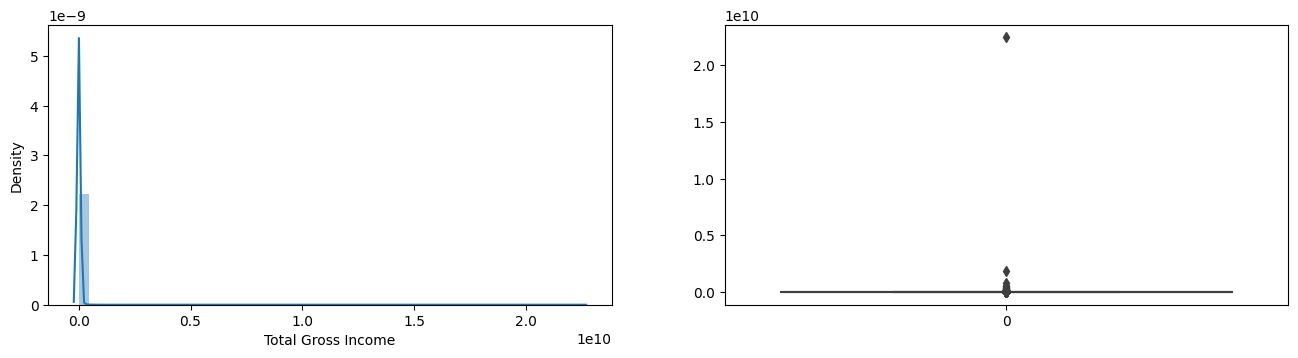

In [112]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(file_3['Total Gross Income'])
plt.subplot(2,2,2)
sns.boxplot(file_3['Total Gross Income'])
plt.show()

To detect outliers we will use IQR rule. 

This technique was sourced from: [youtube.com](https://www.youtube.com/watch?v=Cw2IvmWRcXs)

In [113]:
Q1 = file_3['Total Gross Income'].quantile(0.25)
Q1

31780.5

In [114]:
Q3 = file_3['Total Gross Income'].quantile(0.75)
Q3

720436.75

In [115]:
IQR = Q3 - Q1
IQR

688656.25

In [116]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

In [117]:
lower_limit

-1001203.875

In [118]:
upper_limit

1753421.125

Let's see the ouliers:

In [119]:
file_3.loc[(file_3['Total Gross Income'] > upper_limit) | (file_3['Total Gross Income'] < lower_limit)]

,Registered Charity Number,Registered Charity Name,Status,Also Known As,Primary Address,Governing Form,CRO Number,Country Established,Charitable Purpose,Charitable Objects,...,Income: Philantrophic Orgs,Income: Donations,Financial: Income from bequests,Income: Trading & Commercial,Income: Other Sources,Total Gross Income,Total Gross Expenditure,Total Net Income,Lead Beneficiary,Charity Purpose
0,20059064,Health Service Executive,Registered,Health Service Executive; HSE,"Oak House, Millennium Business Park, Naas, Co....",Other,,Ireland,Other purpose that is of benefit to the commun...,Section 7 of the Health Act 2004 - The object ...,...,"€7,904,000","€15,497,000",0,"€342,780,000","€450,786,000","€22,463,714,000","€22,704,210,000","€-240,496,000",Carers,Other purpose that is of benefit to the community
1,20020286,Higher Education Authority,Registered,Higher Education Authority; An tÚdarás um Ard-...,"3 Shelbourne Buildings, Crampton Avenue, Shelb...",Other,,Ireland,Advancement of education,The HEA has the following statutory functions;...,...,€0,€0,0,€0,"€14,790,000","€1,880,530,000","€1,881,773,000","€-1,243,000",Education services,Advancement of education
2,20029609,POBAL,Registered,POBAL,"Holbrook House, Holles Street, Ireland",Company Limited by Guarantee,194360,Ireland,Relief of poverty or economic hardship; Other ...,(1) The delivery and management of programmes ...,...,€0,€0,0,€0,"€2,000","€814,500,000","€814,613,000","€-113,000",Adult training,Relief of poverty or economic hardship
3,20083236,City of Dublin Education and Training Board,Registered,City of Dublin Education and Training Board,"Town Hall, Merrion Road, Ballsbridge, Dublin 4...",Other,,Ireland,Advancement of education,The advancement of Education & Training within...,...,€0,"€84,238",0,"€317,127","€5,963,803","€564,048,132","€561,647,991","€2,400,141",Education services,Advancement of education
4,20017583,St. James's Hospital Board,Registered,Saint James Hospital; St. James's Hospital Board,"St. James's Hospital Board, James Street, Dubl...",Other,,Ireland,Other purpose that is of benefit to the commun...,"To conduct, maintain, manage and develop at th...",...,€0,€0,0,"€62,993,000",€0,"€544,220,000","€541,800,000","€2,420,000",Health promotion,Other purpose that is of benefit to the community
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1770,20014407,Cumann Arachais Oifigeach an Ghnath-Airm,Registered,Cumann Arachais Oifigeach an Ghnath-Airm; CAOGA,"Defence Forces Headquarters, McKee Bks, Dublin...",Friendly Society,1687f,Ireland,Relief of poverty or economic hardship,Objects of Society. The objects of the Soc...,...,€0,€0,0,€0,"€3,014,469","€3,014,469","€175,880","€2,838,589",Family services,Relief of poverty or economic hardship
1912,20006716,Rehab Group,Registered,Rehab Group,"Unit 10D Beckett Way, Parkwest Business Park, ...",Company Limited by Guarantee,14800,Ireland,Advancement of education; Other purpose that i...,"To provide or assist, by whatever manner or me...",...,€0,"€138,812",0,"€20,960,477","€680,000","€151,346,910","€142,106","€151,204,804",Adult training,Advancement of education
2235,20100872,THE IRISH ONLINE GIVING FOUNDATION,Registered,THE IRISH ONLINE GIVING FOUNDATION; THE IRISH ...,"13 Classon House, Dundrum Business Park, Dundr...",Other Trust,,Ireland,Relief of poverty or economic hardship; Advanc...,The Main Object of the Charity is for the bene...,...,€0,"€3,281,223",0,€0,"€51,846","€3,333,069","€76,405","€3,256,664",Advocacy and civil rights,Relief of poverty or economic hardship
2413,20205692,PAYPAL GIVING FUND IRELAND COMPANY LIMITED BY ...,Registered,PAYPAL GIVING FUND IRELAND COMPANY LIMITED BY ...,"PayPal Giving Fund Ireland, Ballycoolin Busine...",CLG - Company Limited by Guarantee,667516,Ireland,Relief of poverty or economic hardship; Advanc...,The main object for which the Company is estab...,...,"€89,972","€1,420,443",0,€0,"€301,579","€1,811,994","€53,288","€1,758,706",Vo

There have been found 468 outliers.

Let's remove the outliers and save trimmed data in a new dataframe```file_3_no_outliers```. We will then visualise that dataframe using boxplot.

In [120]:
file_3_no_outliers = file_3.loc[(file_3['Total Gross Income'] <= upper_limit) & (file_3['Total Gross Income'] >= lower_limit)]
print('number of values before removing outliers:', len(file_3))
print('number of values after removing outliers:',len(file_3_no_outliers))
print('outliers:', len(file_3)-len(file_3_no_outliers))

number of values before removing outliers: 3608
number of values after removing outliers: 3099
outliers: 509


<AxesSubplot: xlabel='Total Gross Income'>

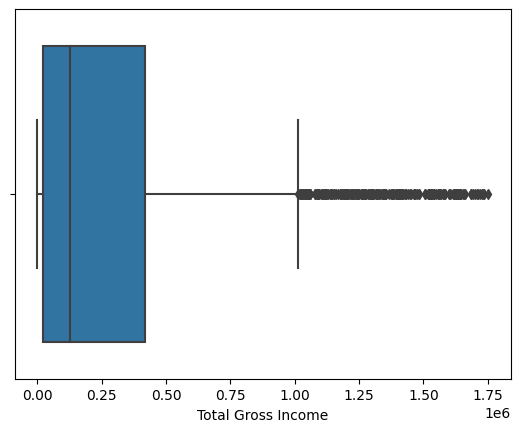

In [121]:
sns.boxplot(x=file_3_no_outliers['Total Gross Income'])

We will use capping method to set all outliers values to upper and lower limit. This technique will also 
help us save all original data without deleting any values.

In [122]:
file_3_no_outliers = file_3.copy()
file_3_no_outliers.loc[(file_3_no_outliers['Total Gross Income']>=upper_limit), 'Total Gross Income'] = upper_limit
file_3_no_outliers.loc[(file_3_no_outliers['Total Gross Income']<=lower_limit), 'Total Gross Income'] = lower_limit

Let's see the distribution of ```Total Gross Income``` after removing the outliers.

<AxesSubplot: xlabel='Total Gross Income'>

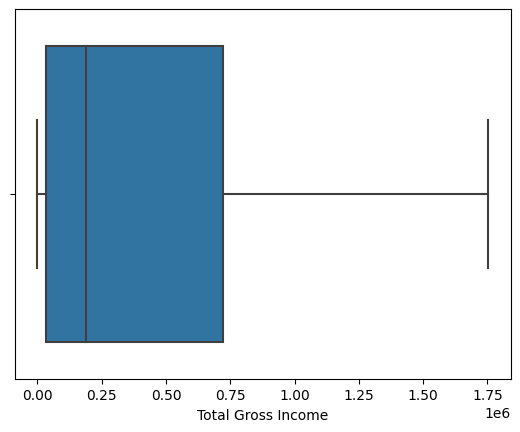

In [123]:
sns.boxplot(x=file_3_no_outliers['Total Gross Income'])

C:\Users\Michal\AppData\Local\Temp\ipykernel_21856\49479749.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(file_3_no_outliers['Total Gross Income'])


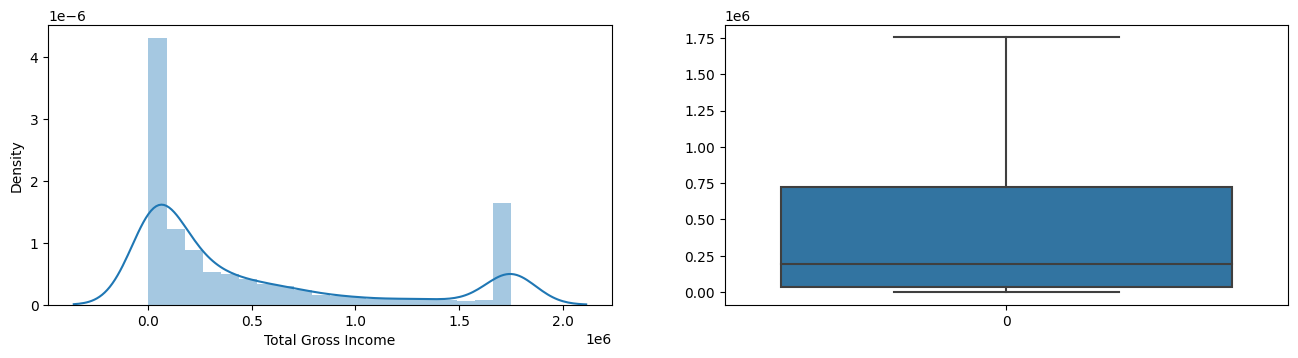

In [124]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(file_3_no_outliers['Total Gross Income'])
plt.subplot(2,2,2)
sns.boxplot(file_3_no_outliers['Total Gross Income'])
plt.show()

In [125]:
len(file_3_no_outliers)

3608

Thanks to the capping method, we can see that no raws in ```Total Gross Income``` have been deleted.

In [126]:
file_3.head()

,Registered Charity Number,Registered Charity Name,Status,Also Known As,Primary Address,Governing Form,CRO Number,Country Established,Charitable Purpose,Charitable Objects,...,Income: Philantrophic Orgs,Income: Donations,Financial: Income from bequests,Income: Trading & Commercial,Income: Other Sources,Total Gross Income,Total Gross Expenditure,Total Net Income,Lead Beneficiary,Charity Purpose
0,20059064,Health Service Executive,Registered,Health Service Executive; HSE,"Oak House, Millennium Business Park, Naas, Co....",Other,,Ireland,Other purpose that is of benefit to the commun...,Section 7 of the Health Act 2004 - The object ...,...,"€7,904,000","€15,497,000",0,"€342,780,000","€450,786,000","€22,463,714,000","€22,704,210,000","€-240,496,000",Carers,Other purpose that is of benefit to the community
1,20020286,Higher Education Authority,Registered,Higher Education Authority; An tÚdarás um Ard-...,"3 Shelbourne Buildings, Crampton Avenue, Shelb...",Other,,Ireland,Advancement of education,The HEA has the following statutory functions;...,...,€0,€0,0,€0,"€14,790,000","€1,880,530,000","€1,881,773,000","€-1,243,000",Education services,Advancement of education
2,20029609,POBAL,Registered,POBAL,"Holbrook House, Holles Street, Ireland",Company Limited by Guarantee,194360,Ireland,Relief of poverty or economic hardship; Other ...,(1) The delivery and management of programmes ...,...,€0,€0,0,€0,"€2,000","€814,500,000","€814,613,000","€-113,000",Adult training,Relief of poverty or economic hardship
3,20083236,City of Dublin Education and Training Board,Registered,City of Dublin Education and Training Board,"Town Hall, Merrion Road, Ballsbridge, Dublin 4...",Other,,Ireland,Advancement of education,The advancement of Education & Training within...,...,€0,"€84,238",0,"€317,127","€5,963,803","€564,048,132","€561,647,991","€2,400,141",Education services,Advancement of education
4,20017583,St. James's Hospital Board,Registered,Saint James Hospital; St. James's Hospital Board,"St. James's Hospital Board, James Street, Dubl...",Other,,Ireland,Other purpose that is of benefit to the commun...,"To conduct, maintain, manage and develop at th...",...,€0,€0,0,"€62,993,000",€0,"€544,220,000","€541,800,000","€2,420,000",Health promotion,Other purpose that is of benefit to the community


<a id ='q12'></a>
#### 12. What are the incomes and spendings based on the country where charity was established?

In [127]:
file_3.groupby("Country Established").agg({
    'Income: Central_Gov Local_Auth':'sum',
    'Income: Other Public Bodies':'sum',
    'Income: Philantrophic Orgs':'sum',
    'Income: Donations':'sum',
    'Income: Trading & Commercial':'sum',
    'Income: Other Sources':'sum',
    'Total Gross Income':'sum',
    'Total Gross Expenditure': 'sum',
    'Total Net Income':'sum'})

,Income: Central_Gov Local_Auth,Income: Other Public Bodies,Income: Philantrophic Orgs,Income: Donations,Income: Trading & Commercial,Income: Other Sources,Total Gross Income,Total Gross Expenditure,Total Net Income
Country Established,,,,,,,,,
Belgium,€0,€0,€0,€420,€0,"€1,541,988","€1,542,408","€977,330","€565,078"
France,"€4,925,860",€0,€0,"€748,371","€5,267,740","€2,568,084","€13,990,917","€16,053,715","€-2,062,798"
India,€0,€0,€0,"€390,488",€0,€0,"€390,488","€192,368","€198,120"
Iraq,€0,€0,€0,"€6,600",€0,€0,"€6,600","€3,745","€2,855"
Ireland,"€29,580,128,981","€2,469,191,055","€80,549,567","€789,972,467","€1,464,953,068","€1,238,159,363","€35,689,447,941","€35,501,146,932","€188,301,009"
Italy,€0,€0,€0,€0,"€460,074","€45,819","€537,499","€287,769","€249,730"
United Kingdom,"€863,124","€102,478","€123,757","€19,762,846","€15,595,793","€20,628,441","€60,704,096","€51,809,486","€8,894,610"


#### The End

### Thank You